## ML Classification Models Prototype:
##### - Loading Data
##### - Data Analysis
##### - Evaluation Metrics
##### - Building Supervised Machine Learning Classification Models
##### - Parameter Tuning (Grid Search) of ML Models
##### - Visualizing and Evaluating Results

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#### Python version and python packages used

- Python version is 2.7.8
- sklearn version >= 0.16.1
- pybrain version >= 0.3
- pandas version >= 0.16.2
- scipy version >= 0.14.0
- numpy version >= 1.9.1
- matplotlib version >= 1.4.2
- seaborn version >= 0.5.0
- brewer2mpl version >= 1.4.1
- IPython version >= 3.1.0

In [27]:
import os
import itertools
import time
from sklearn.feature_extraction import text
from sklearn import cross_validation 
from sklearn import decomposition
from sklearn import neighbors
from sklearn import ensemble
from sklearn import feature_extraction
from sklearn import feature_selection
from sklearn import grid_search
from sklearn import metrics
from sklearn import naive_bayes
from sklearn import pipeline
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn import cluster
from sklearn.kernel_approximation import RBFSampler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import log_loss
from sklearn.lda import LDA
from sklearn.learning_curve import learning_curve
from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import sklearn
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
import prettyplotlib as ppl
import brewer2mpl
import IPython
import pandas as pd
import scipy.io
import math
import pybrain
import pkg_resources

#### Check python and python packages version

In [28]:
print("Python version is {}".format(sys.version))
print("sklearn version = {}".format(sklearn.__version__))
print("pandas version = {}".format(pd.__version__))
print("scipy version = {}".format(scipy.__version__))
print("numpy version = {}".format(numpy.__version__))
print("matplotlib version = {}".format(matplotlib.__version__))
print("seaborn version = {}".format(sns.__version__))
print("brewer2mpl version = {}".format(brewer2mpl.__version__))
print("IPython version = {}".format(IPython.__version__))

Python version is 2.7.11 (default, Jan 22 2016, 08:29:18) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]
sklearn version = 0.17.1
pandas version = 0.15.1
scipy version = 0.17.0
numpy version = 1.11.0
matplotlib version = 1.4.2
seaborn version = 0.5.0
brewer2mpl version = 1.4.1
IPython version = 3.1.0


## Dataset Information

#### Dataset souce is from CrowdFlower,  Data For Everyone Library, <a href="http://www.crowdflower.com/data-for-everyone">Apple Computers Twitter sentiment</a>

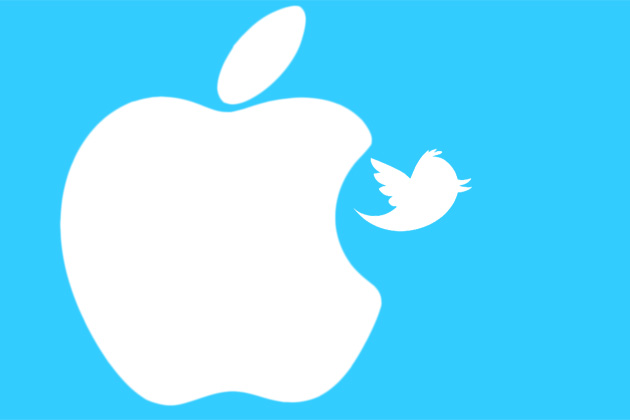

In [29]:
from IPython.display import Image
Image(filename="images/Apple_Twitter.jpg")

A look into the sentiment around Apple, based on tweets containing #AAPL, @apple, etc.

Contributors were given a tweet and asked whether the user was positive, negative, or neutral about Apple. (They were also allowed to mark "the tweet is not about the company Apple, Inc.)

Tweets cover a wide array of topics including stock performance, new products, IP lawsuits, customer service at Apple stores, etc.

Note: Data containing need neurtal sentiments have been removed to make the dataset a binary classification dataset

Train dataset has 2500 rows and Test Dataset has 650 rows.

## Loading the Dataset

#### Load Train Set

In [30]:
df = pd.read_csv('data/Apple_Twitter_Sentiment_Train.csv', index_col=0)
df.head()

text  sentiment
1953  hey how about you guys make a charger that las...          0
1301  apple fibonacci levels intraday update aapl ht...          1
89     aapl did carl icahn cause a new private equit...          1
3362  strikes me as somewhat stupid that have sent m...          0
80     aapl beacons hit stores ahead of holidays htt...          1

In [31]:
X1 = df['text']
y = df['sentiment']
print X1.shape
print y.shape

(2500,)
(2500,)


#### Create a World Cloud from Train Set Tweets

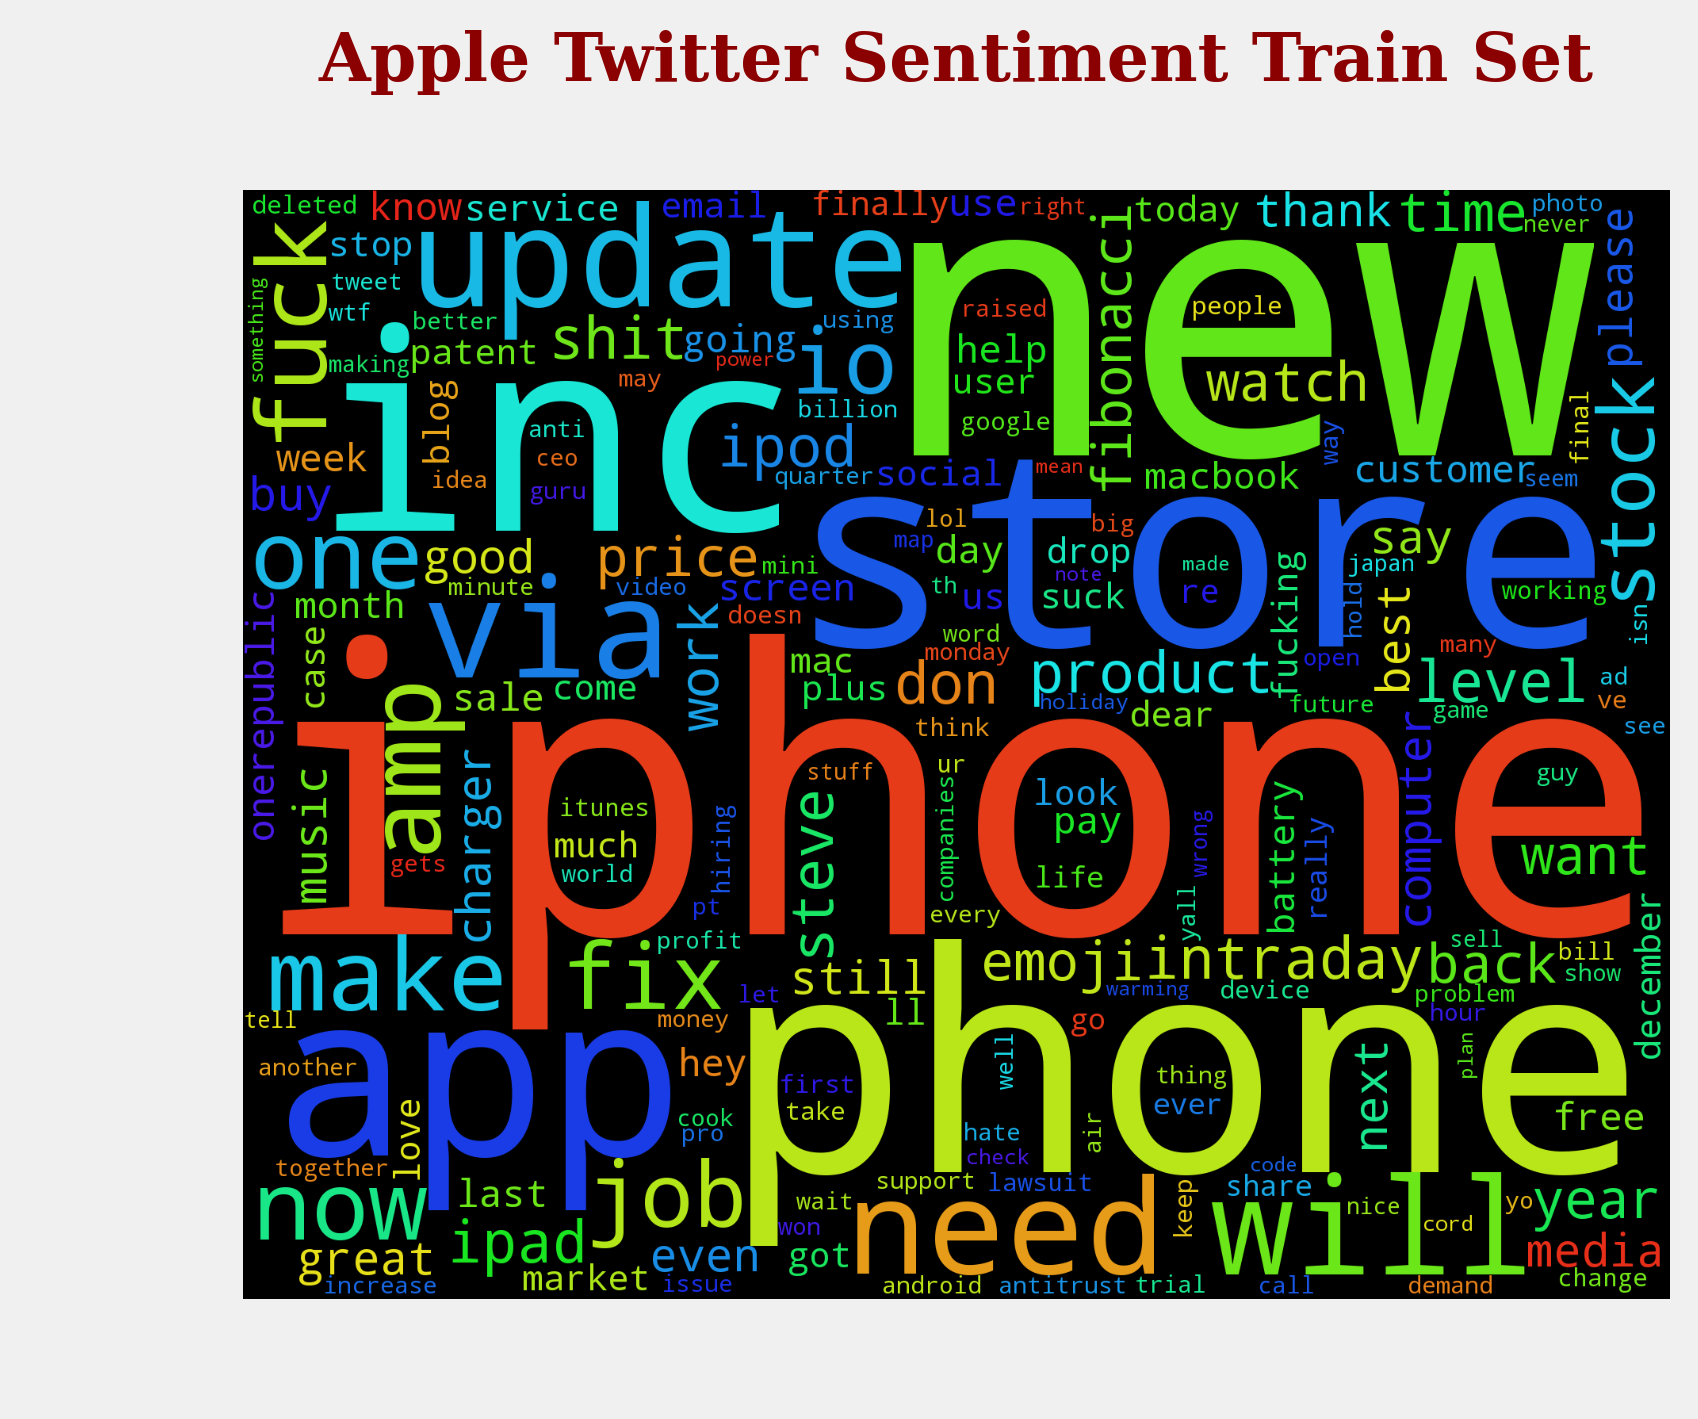

In [32]:
Image(filename="images/Apple_Twitter_Train_WordCloud.png")

#### Load Test Set

In [33]:
df_t = pd.read_csv('data/Apple_Twitter_Sentiment_Test.csv')
df_t.head()

Unnamed: 0                                               text  sentiment
0        1567  at all not you gotta be kidding me http t co f...          1
1        1135   venturebeat first to own digital lang ip is n...          1
2         378         alzaabi i wish i could man i wish i could           1
3        2241  jmp securities apple inc is going to to sell h...          1
4         207   google surpasses in u s sales http t co dgebb...          1

In [34]:
Xt1 = df_t['text']
yt = df_t['sentiment']
print Xt1.shape
print yt.shape

(650,)
(650,)


#### Create a World Cloud from Test Set Tweets

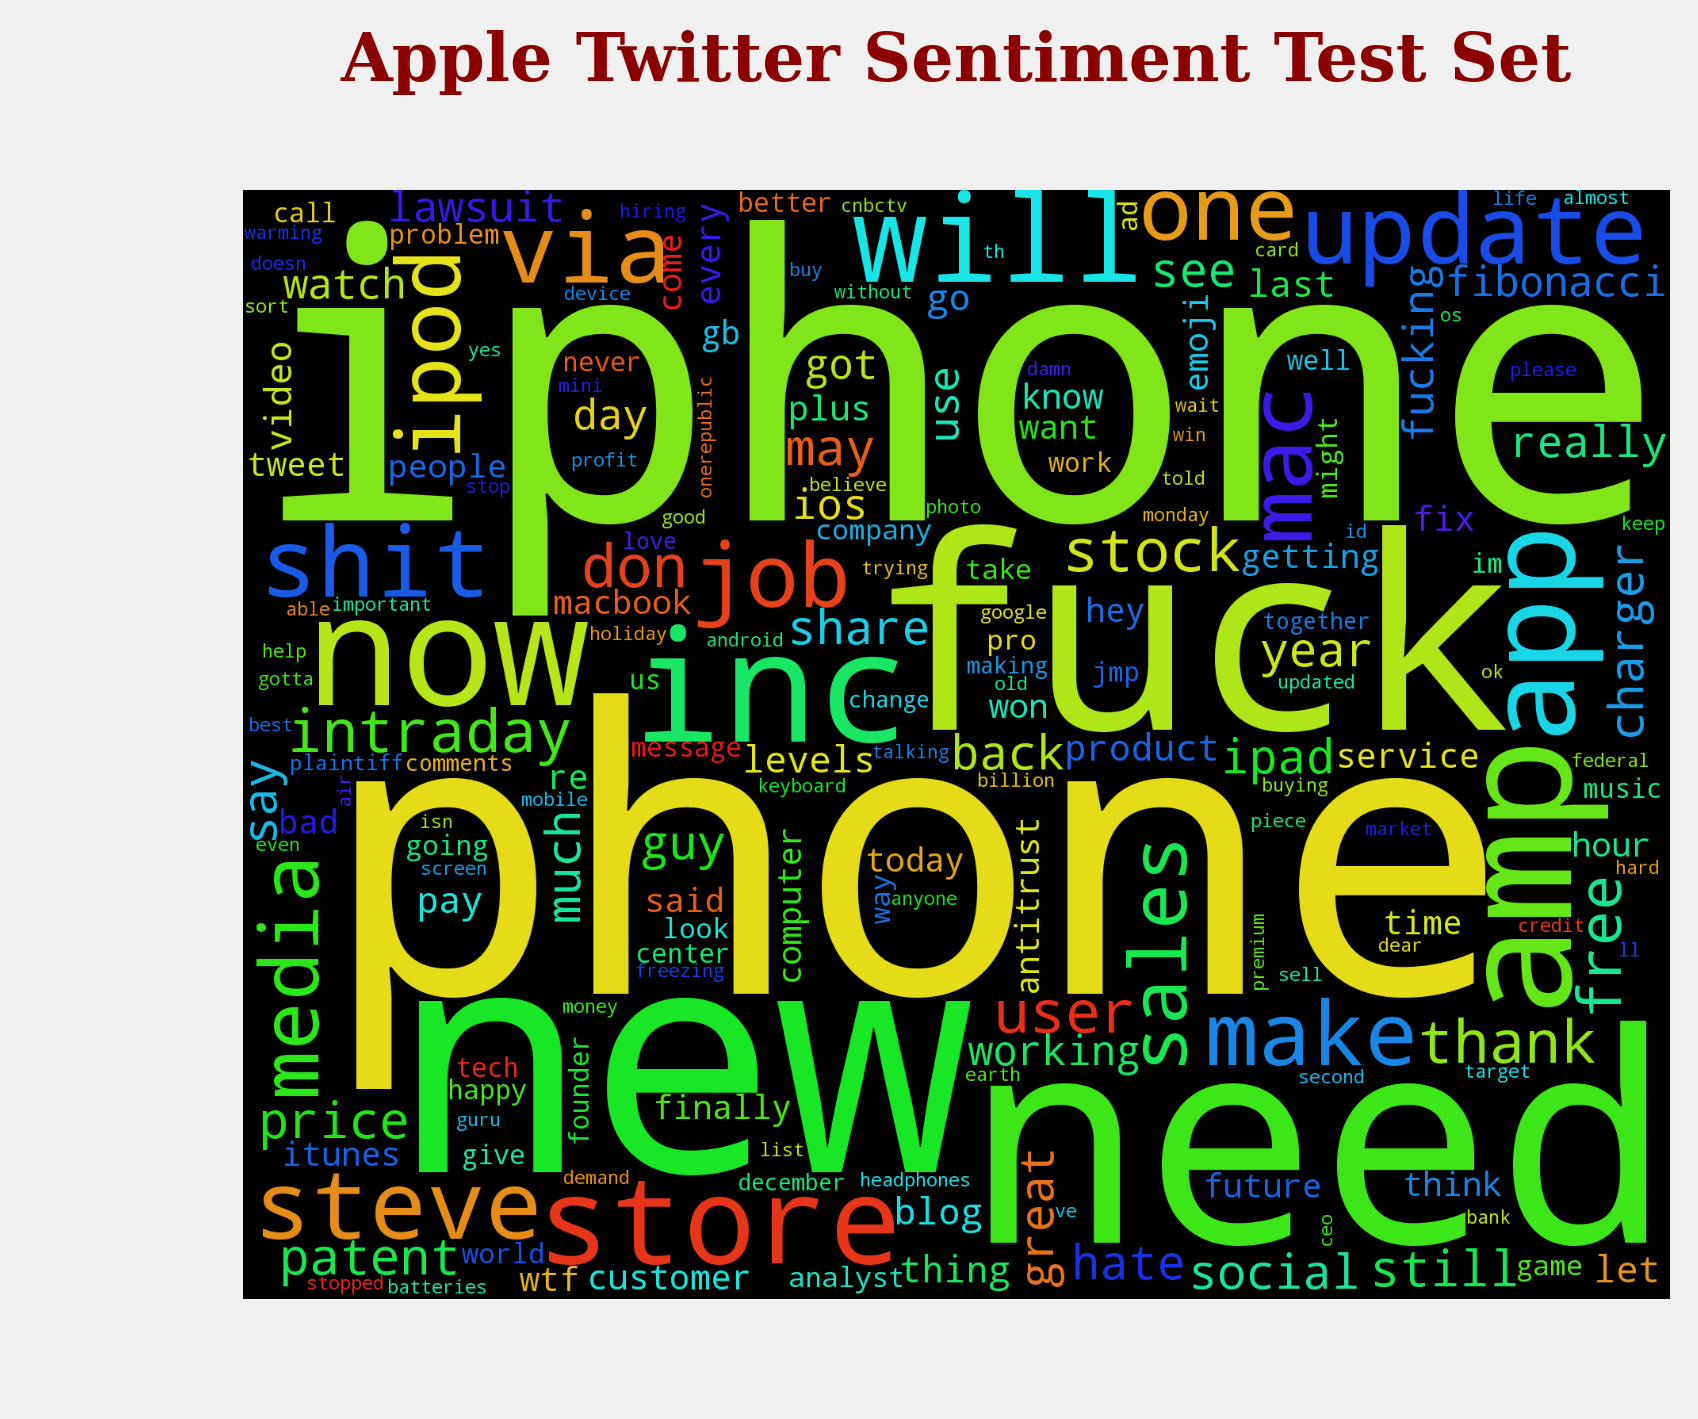

In [35]:
Image(filename="images/Apple_Twitter_Test_WordCloud.png")

Comparing the word clouds of train and test dataset, it's clear that the top words are very different, making the test dataset a good candidate for testing. 

## Data Pre-Processing 

#### Feature extraction

- min_df=5, discard words appearing in less than 5 documents
- max_df=0.8, discard words appearing in more than 80% of the documents
- sublinear_tf=True, use sublinear weighting
- use_idf=True, enable IDF
- n-gram=(1,3), sequence of words from 1 to 3 are used to improve sentiment prediction.

In [36]:
vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 0.8,
                             ngram_range = (1,3),
                             sublinear_tf=True,
                             stop_words='english',
                             use_idf=True)
X = vectorizer.fit_transform(X1)
Xt = vectorizer.transform(Xt1)
print X.shape
print Xt.shape

(2500, 894)
(650, 894)


In [37]:
vectorizer.vocabulary_.get('great')

354

## Set parameters for visualization

#### Set Matplotlib Parameters

In [38]:
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'bold',
        'size'   : 16,
        }
    
plt.rc('font',family='serif')
plt.rc('font', size=16)
plt.rc('font', weight='bold')
plt.style.use('fivethirtyeight')
    
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 6 and height to 6
fig_size[0] = 6
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

## Data Analysis

#### Get total rows of each sentiment 

In [39]:
df2 = pd.unique(df['sentiment'].values)
print "Total number of unique sentiment = ", df2.shape
print "="*66
print "Sentiment:\n"
print df2
df2 = df[['sentiment']]
byCandidate = df2.groupby('sentiment').describe()
print "="*66
print "Totals by sentiment:\n"
print byCandidate

Total number of unique sentiment =  (2,)
Sentiment:

[0 1]
Totals by sentiment:

Empty DataFrame
Columns: []
Index: []


In [40]:
bad , good = sum(df2.loc[:, 'sentiment'] == 0), sum(df2.loc[:, 'sentiment'] == 1)
print(bad , good)

(875, 1625)


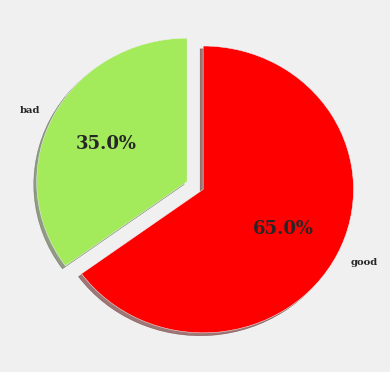

In [41]:
from matplotlib import rcParams
rcParams['font.size'] = 18
blue = '#5A6FFA'
green = '#A3EB5B'
red = '#FF0000'

piechart = plt.pie(
    (bad , good),
    labels=('bad', 'good'),
    shadow=True,
    colors=(green, red),
    explode=(0.06,0.06), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentages
)

In [42]:
df3 = pd.unique(df_t['sentiment'].values)
print "Total number of unique sentiment = ", df3.shape
print "="*66
print "Sentiment:\n"
print df3
df3 = df_t[['sentiment']]
byCandidate = df3.groupby('sentiment').describe()
print "="*66
print "Totals by sentiment:\n"
print byCandidate

Total number of unique sentiment =  (2,)
Sentiment:

[1 0]
Totals by sentiment:

Empty DataFrame
Columns: []
Index: []


In [43]:
bad , good = sum(df3.loc[:, 'sentiment'] == 0), sum(df3.loc[:, 'sentiment'] == 1)
print(bad , good)

(227, 423)


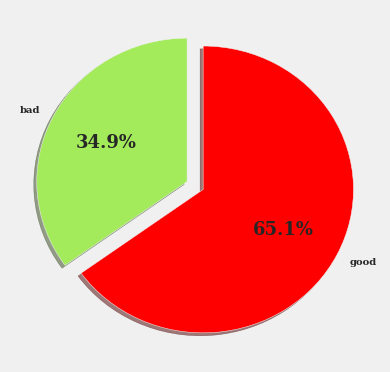

In [44]:
piechart = plt.pie(
    (bad , good),
    labels=('bad', 'good'),
    shadow=True,
    colors=(green, red),
    explode=(0.06,0.06), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentages
)

## Evaluation Metrics

#### Train/Validation/Test sets:
Training set was split into train and validation set during 10-fold cross-validation and 80/20 ratio on other metric measurement phases before extracting scores on the full training set. Only the final tuned model was used on the test set. Test set is based on a completely separate test csv file and only used for final predictions. Test set wasn’t used in any training. Final model is trained on original training set (without splitting of train and validation) so that all training samples used before prediction on the standalone test set. This trifurcation of sets helps keep final accuracy of model less biased towards the training set and accurately gauge the predictive power on the unknown future samples in production.

#### 10-fold Cross-validation:

Cross-validation scores for all algorithms were based on 10-fold cross-validation; which has lower variance than a single hold-out validation set. Single hold-out validation is equivalent of one fold cross-validation which has less randomness than 10-fold, hence more bias in the data which would lead to a higher variance and an over- fitting final model. Cross-validation scores are based on mean of the scores from the 10-fold cross-validation. Accuracy and F1 Scores on training set are based on 10-fold cross-validation.

#### Type 1 and Type II Errors:

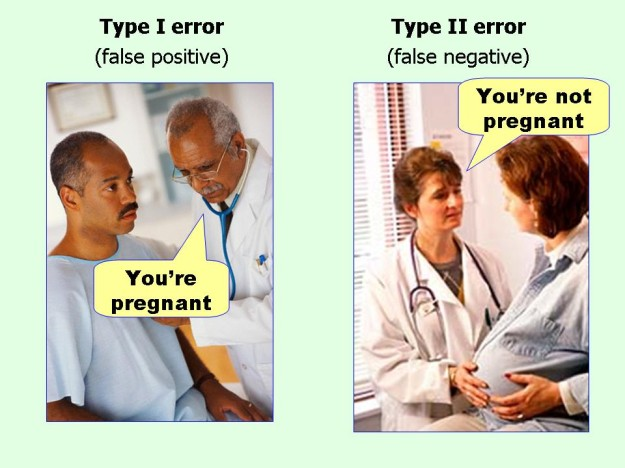

In [45]:
Image(filename="images/Type-I-and-II-errors.jpg")

<a href="http://flowingdata.com/2014/05/09/type-i-and-ii-errors-simplified/">source</a>

#### Accuracy Score:

Accuracy score is a ratio of (true positives / total number of samples). Accuracy score does not incorporate the fact of unbalanced dataset in the scoring schema. Using only the accuracy score in this analysis might lead to picking a wrong model. Hence, combinations of all the metrics were used to pick the final winners. Accuracy scores were based on 10-fold cross-validation.

#### Precision-Recall/ F1 Score:

The precision is the ratio of true positives/ (true positives + false positives) which is the measure of the classifier’s ability to not label negative samples as positive. The recall is the ratio of true positives/ (true positives + false negatives) which is the measure of classifiers’ ability to identify all true positives. F1 score is a combination of precision and recall scores, which is given by the formula F1 = 2 * (precision * recall) / (precision + recall). Given both the dataset’s used in this analysis are unbalanced and skewed (uneven number of rows per target class), precision and recall scores alone will not be good measure of accuracy. F1 score which is a harmonic mean between precision and recall takes into measure the fact of imbalanced classes. F1-scores were based on 10-fold cross-validation and this is the one of the most important metrics used since both datasets are unbalanced.

#### Confusion Matrix: 

Confusion matrix helps decipher the accuracy of the model by a detailed breakdown of the correct and incorrect classifications for each target class. This is very helpful for this analysis since both the datasets used are unbalanced datasets. Confusion matrixes are shown for both training and test datasets.

## Functions

### Model Selection

In [46]:
def models(clf, title, name):
    start = time.time()
    print clf
    print ""
    # fit the model
    clf.fit(X_train, y_train)
    # make predictions
    clf.predict(X_test)
    # summarize the fit of the model
    score = clf.score(X_train, y_train)
    print "Classification score using train set: {}\n".format(str(score))
    score = clf.score(X_test, y_test)
    print "Classification score using test set: {}\n".format(str(score))
    print"="*66
    print ""
    expected = y
    predicted = clf.predict(X)
    # print confusion matrix
    cm = metrics.confusion_matrix(expected, predicted)
    target_names = ['bad', 'good']
    fig, ax = plt.subplots()
    sns_cm = sns.heatmap(cm, annot=True, fmt='', xticklabels=target_names, yticklabels=target_names , ax=ax)
    title = "Apple Tweets Training Dataset - " + title
    ax.set_title(title, y=1.08, fontdict=font)
    #fig.tight_layout()
    #fig.savefig(name, bbox_inches='tight')
    fig.show()
    # train the model with whole training dataset now
    clf.fit(X, y)
    end = time.time()
    total = end-start
    minutes = total//60.0
    seconds = total%60.0
    print "Total running time for this model = {} seconds ({} minutes {} seconds)".format(total, minutes, seconds)
    print ""
    return

In [47]:
def models_test(clf, title, name):
    print clf
    print ""
    # make predictions
    expected = yt
    predicted = clf.predict(Xt)
    # summarize the fit of the model
    score = clf.score(Xt, yt)
    print "Classification score using test set: {}\n".format(str(score))
    print"="*66
    print ""
    # summarize the fit of the model
    print(metrics.classification_report(expected, predicted))
    print"="*66
    # print confusion matrix
    cm = metrics.confusion_matrix(expected, predicted)
    target_names = ['bad', 'good']
    fig, ax = plt.subplots()
    sns_cm = sns.heatmap(cm, annot=True, fmt='', xticklabels=target_names, yticklabels=target_names , ax=ax)
    title = "Apple Tweets Test Dataset - " + title
    ax.set_title(title, y=1.08, fontdict=font)
    #fig.tight_layout()
    #fig.savefig(name, bbox_inches='tight')
    fig.show()

In [48]:
def plot_learning_curve(estimator, title, name, ylim=None):
    
    train_sizes=np.linspace(.1, 1.0, 20)
    cv=None
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    title = "Apple Tweets Dataset - " + title
    plt.title(title, y=1.08, fontdict=font)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontdict=font)
    plt.ylabel("Score", fontdict=font)
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.plot(train_sizes, train_scores_mean, color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, color="g",
             label="Cross-validation score")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    #plt.savefig(name, bbox_inches='tight')
    plt.show()
    return 

In [49]:
def plot_learning_curve_ot(model, title, name):
    training_error = []
    test_error = []
    mse = metrics.mean_squared_error
    N_range = np.linspace(15, X_train.shape[0], 20).astype(int)
    for N in N_range:
        XN = X_train[:N]
        yN = y_train[:N]
    
        model.fit(XN, yN)
        training_error.append(mse(model.predict(XN), yN))
        test_error.append(mse(model.predict(X_test), y_test))
      
    plt.plot(N_range, training_error, label='Training', color="r")
    plt.plot(N_range, test_error, label='Test', color="g")
    #plt.plot(N_range, np.ones_like(N_range), ':k')
    title = "Apple Tweets Dataset - " + title
    plt.title(title, y=1.08, fontdict=font)
    plt.xlabel("Training examples", fontdict=font)
    plt.ylabel("Error", fontdict=font)
    plt.ylim(0,1)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    #plt.savefig(name, bbox_inches='tight')
    plt.show()
    return 

In [50]:
def plot_roc(model, title, name):
    model.fit(X_train, y_train)
    actuals = y_test
    predictions  = model.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(actuals, predictions)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    
    actuals_t = yt
    predictions_t  = model.predict(Xt)
    false_positive_rate_t, true_positive_rate_t, thresholds_t = metrics.roc_curve(actuals_t, predictions_t)
    roc_auc_t = metrics.auc(false_positive_rate_t, true_positive_rate_t)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, 'r', label='Training = %0.2f'% roc_auc)
    plt.plot(false_positive_rate_t, true_positive_rate_t, 'g', label='Test = %0.2f'% roc_auc_t)
    #plt.fill(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.5, )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontdict=font)
    plt.ylabel('True Positive Rate', fontdict=font)
    title = "Apple Tweets Dataset - " + title
    plt.title(title, fontdict=font)
    plt.legend(loc="lower right", fontsize=20)
    #plt.savefig(name, bbox_inches='tight')
    plt.show()
    return roc_auc, roc_auc_t, 

#### Convert features from sparse to denser format  (because the original features were text from a text dataset)

In [51]:
X = X.toarray()
Xt = Xt.toarray()
print X.shape
print y.shape
print Xt.shape
print yt.shape

(2500, 894)
(2500,)
(650, 894)
(650,)


### Split Train data into Train and Test for Cross Validation

In [52]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=42)
print X_train.shape
print y_train.shape
sample_weight = np.array([1 if i == 0 else 2 for i in y_train])

(2000, 894)
(2000,)


### Decision Tree Model

#### Decision Tree Model Before Pruning

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

Classification score using train set: 0.9315

Classification score using test set: 0.746


Total running time for this model = 0.800326108932 seconds (0.0 minutes 0.800326108932 seconds)



/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


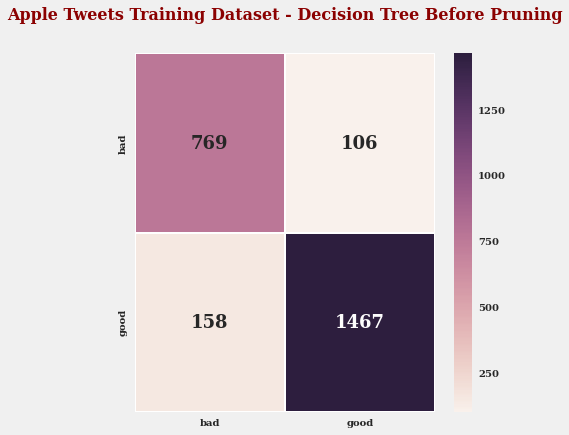

In [53]:
model = tree.DecisionTreeClassifier(criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            random_state=123, splitter='best')
models(model, "Decision Tree Before Pruning", "a_dt_b_cm_train.png") 

#### Decision Tree Model - Test Set ROC & AUC Score Before Pruning

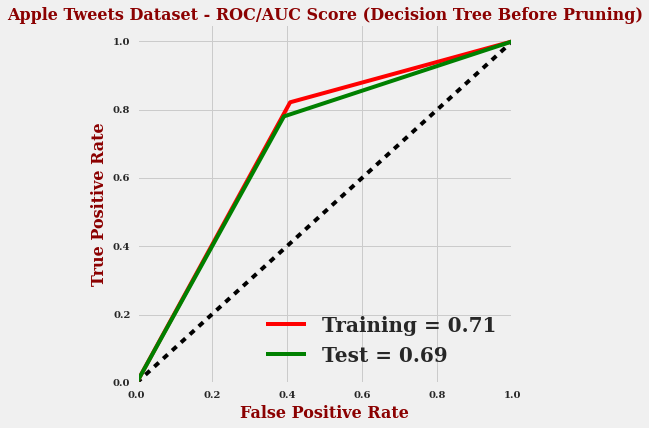

(0.70644599303135891, 0.69403567969506674)

In [54]:
plot_roc(model, "ROC/AUC Score (Decision Tree Before Pruning)", "a_dt_b_roc.png")

#### Decision Tree Model - Learning Curve Before Pruning

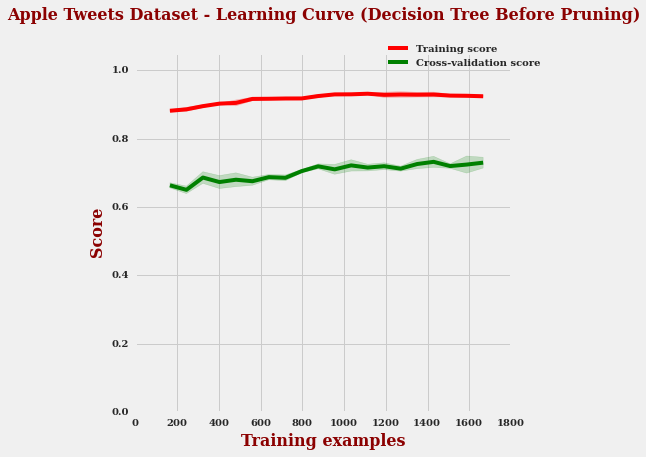

In [55]:
plot_learning_curve(model, "Learning Curve (Decision Tree Before Pruning)", "a_dt_b_lca.png", ylim=(0,1.05))

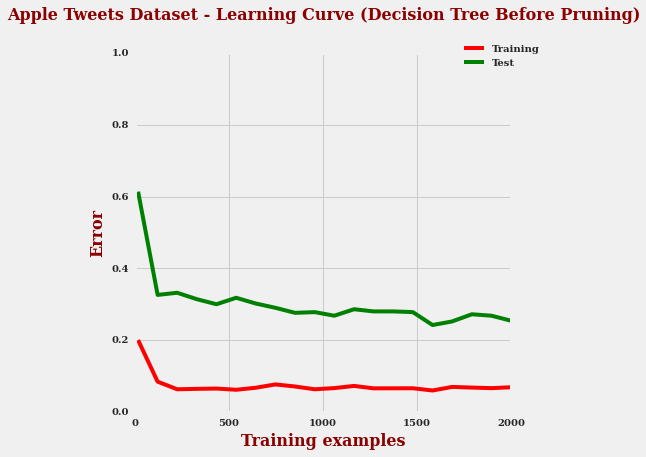

In [56]:
plot_learning_curve_ot(model, "Learning Curve (Decision Tree Before Pruning)", "a_dt_b_lce.png")

#### Decision Tree Model - Test Set Accuracy Before Pruning

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

Classification score using test set: 0.72


             precision    recall  f1-score   support

          0       0.60      0.61      0.60       227
          1       0.79      0.78      0.78       423

avg / total       0.72      0.72      0.72       650



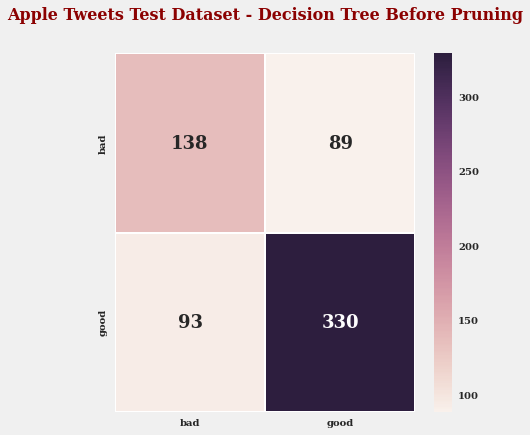

In [57]:
models_test(model, "Decision Tree Before Pruning", "a_dt_b_cm_test.png") 

#### Decision Tree Model - Find Best Accuracy Parameters by Pruning

Decision Tree: 1, Accuracy: 0.740000
Decision Tree: 2, Accuracy: 0.740000
Decision Tree: 3, Accuracy: 0.740000
Decision Tree: 4, Accuracy: 0.740000
Decision Tree: 5, Accuracy: 0.740000
Decision Tree: 6, Accuracy: 0.740000
Decision Tree: 7, Accuracy: 0.740000
Decision Tree: 8, Accuracy: 0.740000
Decision Tree: 9, Accuracy: 0.740000
Decision Tree: 10, Accuracy: 0.740000
Decision Tree: 11, Accuracy: 0.740000
Decision Tree: 12, Accuracy: 0.740000
Decision Tree: 13, Accuracy: 0.748000
Decision Tree: 14, Accuracy: 0.714000
Decision Tree: 15, Accuracy: 0.714000
Decision Tree: 16, Accuracy: 0.714000
Decision Tree: 17, Accuracy: 0.714000
Decision Tree: 18, Accuracy: 0.714000
Decision Tree: 19, Accuracy: 0.714000
Decision Tree: 20, Accuracy: 0.712000
Decision Tree: 21, Accuracy: 0.712000
Decision Tree: 22, Accuracy: 0.740000
Decision Tree: 23, Accuracy: 0.740000


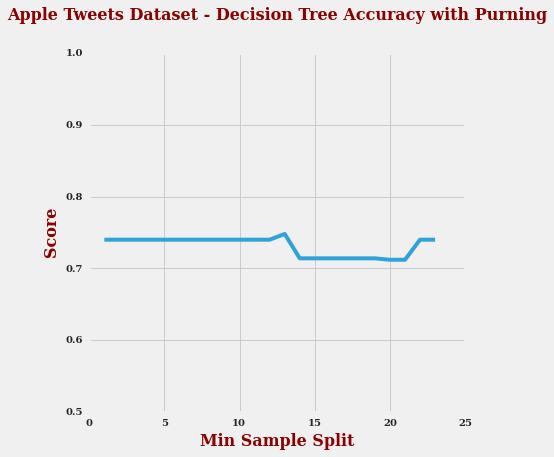

In [59]:
results = []
for n in range(1,24, 1):
    clf = tree.DecisionTreeClassifier( criterion='entropy',
            max_depth=24, max_features="auto", max_leaf_nodes=None,
             min_samples_leaf=6, min_samples_split=n,
            random_state=123, splitter='best')
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))
    print "Decision Tree: %d, Accuracy: %3f" % (n, accuracy)

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])
plt.plot(results.n, results.accuracy)
plt.ylim([0.5,1])
plt.xlabel('Min Sample Split', fontdict=font)
plt.ylabel('Score', fontdict=font)
plt.title("Apple Tweets Dataset - Decision Tree Accuracy with Purning", y=1.08, fontdict=font)
#plt.savefig("a_dt_pruning.png", bbox_inches='tight')
plt.show()

#### Grid Search to find the best pruning parameters

#### Decision Tree Model After Pruning (Depth 40)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=4,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

Classification score using train set: 0.7885

Classification score using test set: 0.77


Total running time for this model = 0.118743896484 seconds (0.0 minutes 0.118743896484 seconds)



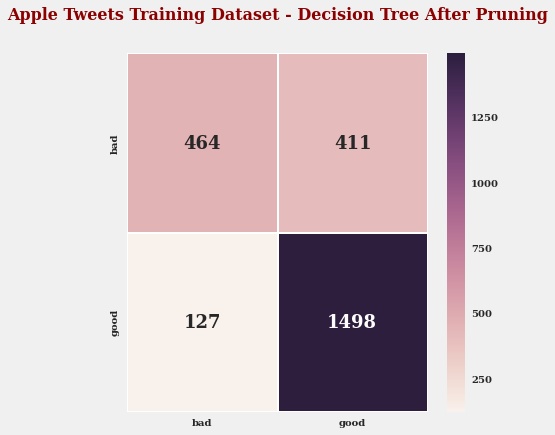

In [60]:
model = tree.DecisionTreeClassifier( criterion='entropy',
            max_depth=40, max_features="auto", max_leaf_nodes=None,
            min_samples_leaf=4, min_samples_split=10,
            random_state=123, splitter='best')
models(model, "Decision Tree After Pruning", "a_dt_a_cm_train.png") 

#### Decision Tree Model - Test Set ROC/AUC Score After Pruning

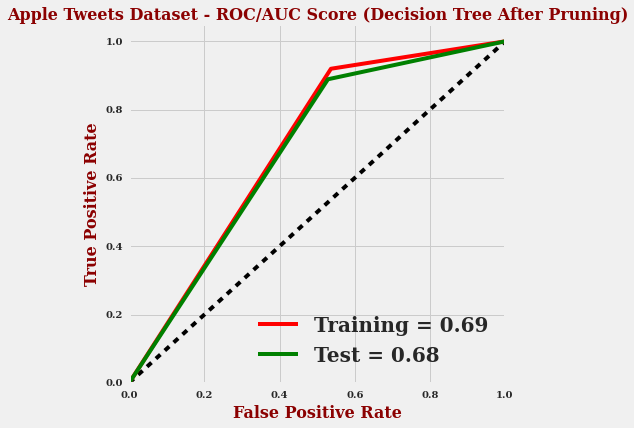

In [61]:
dt_roc, dt_roct = plot_roc(model, "ROC/AUC Score (Decision Tree After Pruning)", "a_dt_a_roc.png")

#### Decision Tree Model - Learning Curve After Pruning

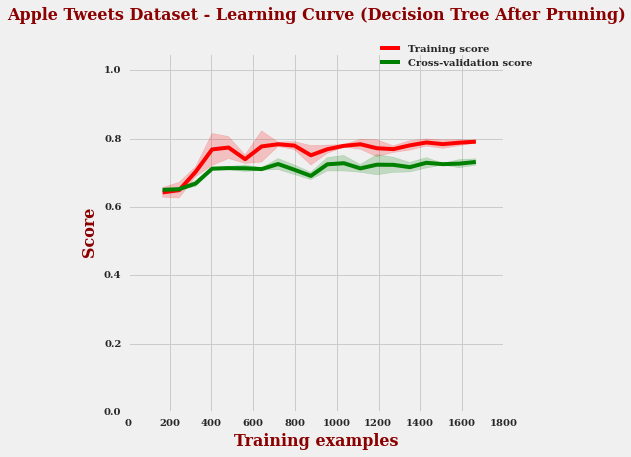

In [62]:
plot_learning_curve(model, "Learning Curve (Decision Tree After Pruning)", "a_dt_a_lca.png", ylim=(0,1.05))

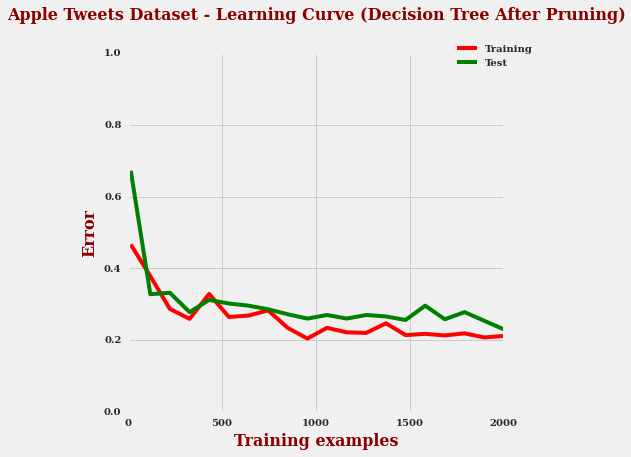

In [63]:
plot_learning_curve_ot(model, "Learning Curve (Decision Tree After Pruning)", "a_dt_a_lce.png")

#### Decision Tree Model - Test Set Accuracy After Pruning

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=4,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

Classification score using test set: 0.743076923077


             precision    recall  f1-score   support

          0       0.69      0.47      0.56       227
          1       0.76      0.89      0.82       423

avg / total       0.74      0.74      0.73       650



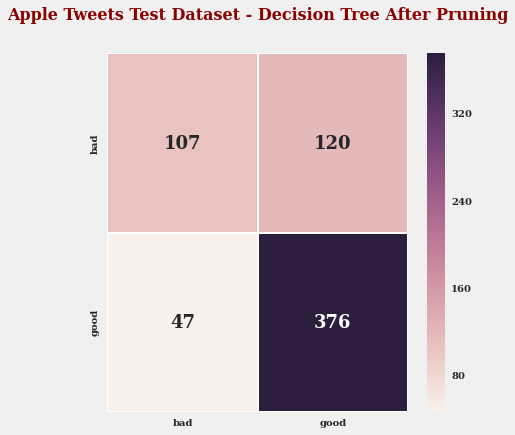

In [64]:
models_test(model, "Decision Tree After Pruning", "a_dt_a_cm_test.png")  

####  Final Decision Tree Model 

In [65]:
dt_train_start = time.time()
model.fit(X,y)
dt_train_end = time.time()
dt_train_time = dt_train_end - dt_train_start
print "Decision Tree Training time in seconds : %3f" % (dt_train_time)
print ""
decisiontree_model = model 
print decisiontree_model
print ""
preds = decisiontree_model.predict(X_test)
#dt_validation_accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))

scores = cross_validation.cross_val_score(model, X, y, cv=10)
dt_validation_accuracy = scores.mean()
print "Decision Tree Validation Set Accuracy: %3f" % (dt_validation_accuracy)
print ""

scores = cross_validation.cross_val_score(model, X, y, cv=10, scoring='f1')
dt_validation_f1 = scores.mean()
print "Decision Tree Validation Set f1: %3f" % (dt_validation_f1)
print ""

dt_predict_start = time.time()
preds = decisiontree_model.predict(Xt)
dt_predict_end = time.time()
dt_predict_time = dt_predict_end-dt_predict_start
print "Decision Tree Prediction time in seconds : %3f" % (dt_predict_time)
print ""
dt_test_accuracy = np.where(preds==yt, 1, 0).sum() / float(len(Xt))
print "Decision Tree Test Set Accuracy: %3f" % (dt_test_accuracy)
print ""

dt_test_f1 = metrics.f1_score(yt, preds, average="micro")
print "Decision Tree Test Set f1 Score: %3f" % (dt_test_accuracy)
print ""

Decision Tree Training time in seconds : 0.024111

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=4,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

Decision Tree Validation Set Accuracy: 0.739604

Decision Tree Validation Set f1: 0.818588

Decision Tree Prediction time in seconds : 0.001246

Decision Tree Test Set Accuracy: 0.736923

Decision Tree Test Set f1 Score: 0.736923



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


### KNN Model

#### KNN Model Decision

- Number of neighbour are tuned to 10 for best accuracy
- Uniform Weights gives better accuracy than Distance Weights. All points in the neighborhood are considered of uniform weight instead of inverse of their distance.
- Uniform Weights were chosen for accuracy but it's slower training time than Distance Weights since it considers all training points. But difference in training time is negibible for this dataset
- Euclidean distance function is used since it gives better accuracy than Manhattan distance. 
- KNN doesn't give much accuracy as other algorithms since there are many features and it tends to overfit - curse of dimensionality.
- The curse of dimernsionality in the dataset affects KNN's performance.

#### KNN Model with Euclidean Distance and 2 Neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

Classification score using train set: 0.897

Classification score using test set: 0.686


Total running time for this model = 8.77110791206 seconds (0.0 minutes 8.77110791206 seconds)



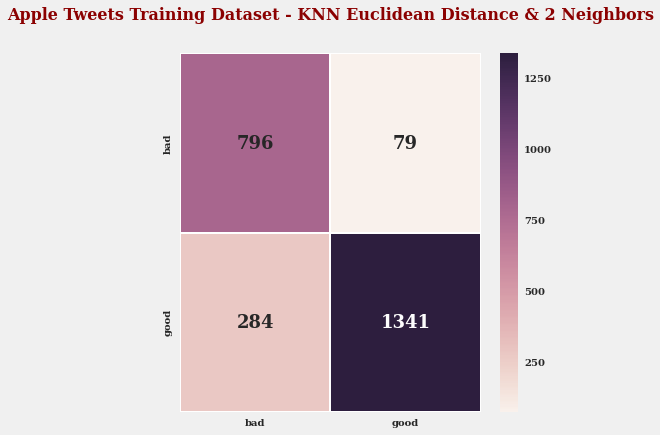

In [66]:
model = neighbors.KNeighborsClassifier(n_neighbors=2, weights='uniform')
models(model, "KNN Euclidean Distance & 2 Neighbors", "a_knn_b_cm_train.png")  

#### KNN Model - Test Set AUC Score with Euclidean Distance and 2 Neighbors

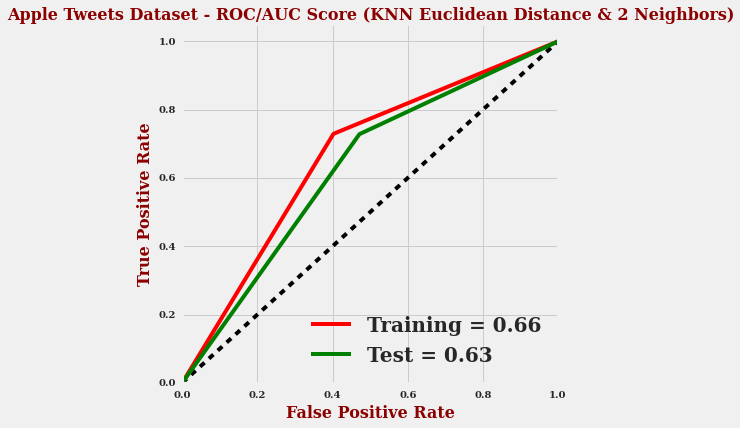

(0.66336382113821135, 0.62838337447016801)

In [67]:
plot_roc(model, "ROC/AUC Score (KNN Euclidean Distance & 2 Neighbors)", "a_knn_b_roc.png")

#### KNN Model - Learning Curve with Euclidean Distance and 2 Neighbors

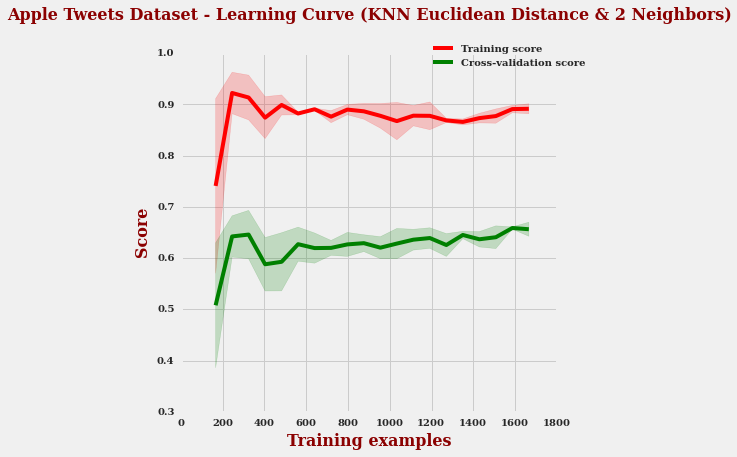

In [68]:
plot_learning_curve(model, "Learning Curve (KNN Euclidean Distance & 2 Neighbors)", "a_knn_b_lca.png", ylim=None)

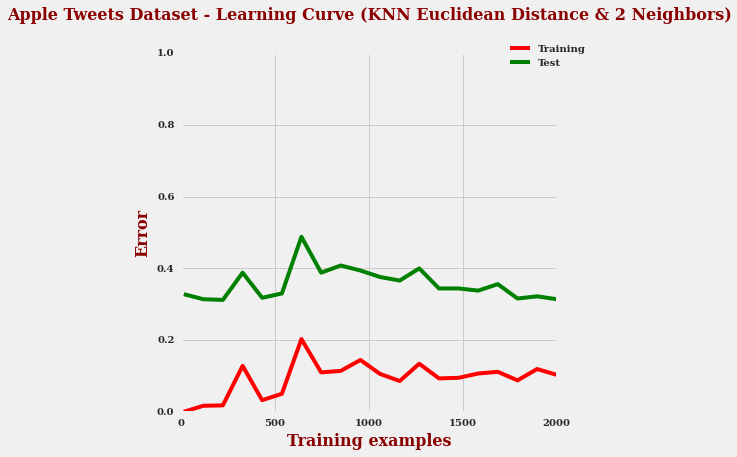

In [69]:
plot_learning_curve_ot(model, "Learning Curve (KNN Euclidean Distance & 2 Neighbors)", "a_knn_b_lce.png")

#### KNN Model - Test Set Accuracy with Euclidean Distance and 2 Neighbours

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

Classification score using test set: 0.658461538462


             precision    recall  f1-score   support

          0       0.51      0.53      0.52       227
          1       0.74      0.73      0.74       423

avg / total       0.66      0.66      0.66       650



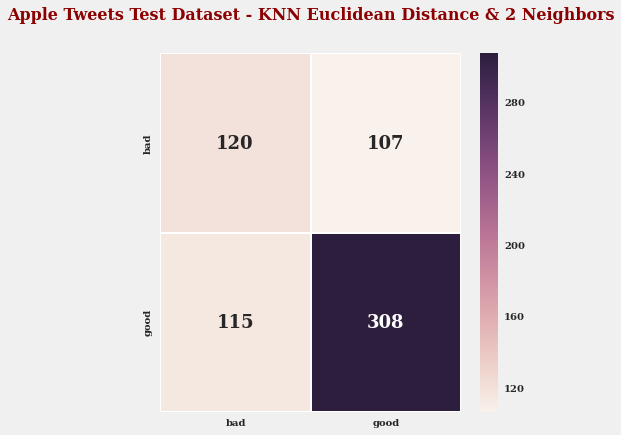

In [70]:
models_test(model, "KNN Euclidean Distance & 2 Neighbors", "a_knn_b_cm_test.png") 

#### KNN Model with Manhattan Distance and 2 Neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=1,
           weights='uniform')

Classification score using train set: 0.897

Classification score using test set: 0.652


Total running time for this model = 7.82524704933 seconds (0.0 minutes 7.82524704933 seconds)



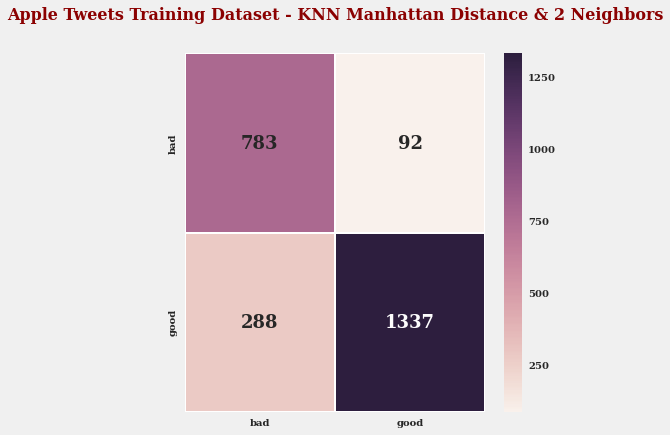

In [71]:
model = neighbors.KNeighborsClassifier(n_neighbors=2, weights='uniform', p=1)
models(model, "KNN Manhattan Distance & 2 Neighbors", "a_knn_b_cm2_train.png")      

#### KNN Model - Test Set AUC Score with Manhattan Distance and 2 Neighbors

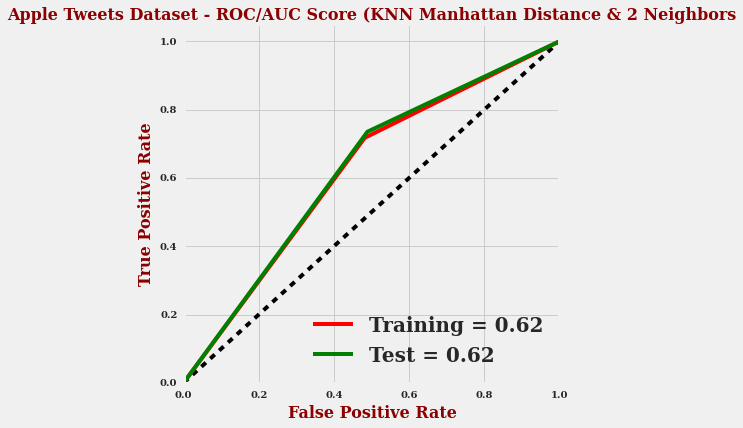

(0.61777729384436708, 0.62311890107372347)

In [72]:
plot_roc(model, "ROC/AUC Score (KNN Manhattan Distance & 2 Neighbors", "a_knn_b2_roc.png")

####  KNN Model - Learning Curve with Manhattan Distance and 2 Neighbors

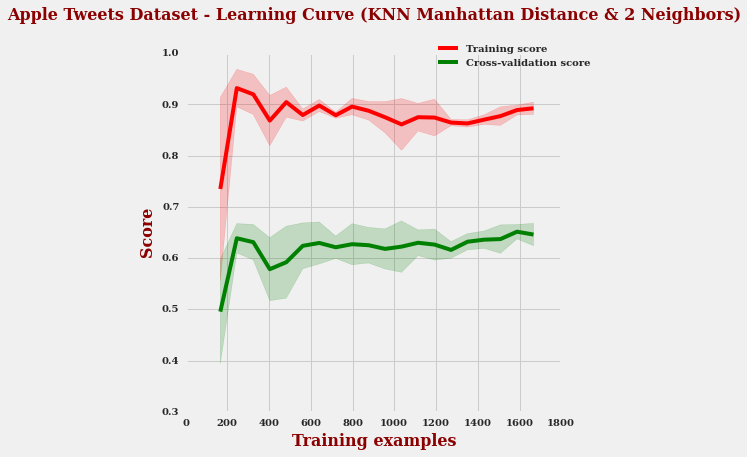

In [73]:
plot_learning_curve(model, "Learning Curve (KNN Manhattan Distance & 2 Neighbors)", "a_knn_b2_lca.png", ylim=None)

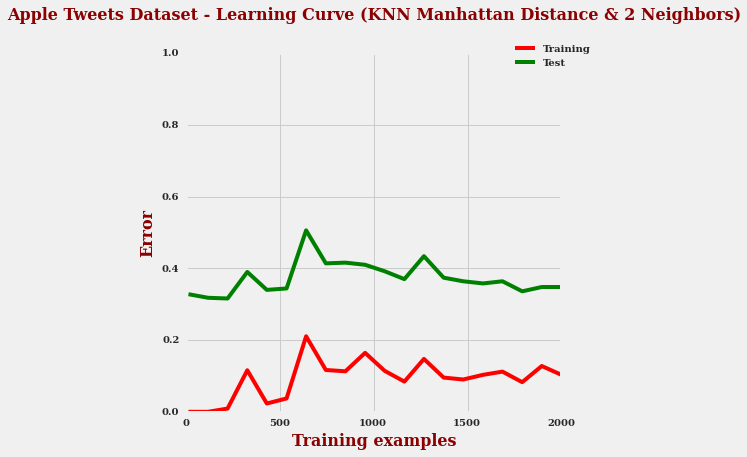

In [74]:
plot_learning_curve_ot(model, "Learning Curve (KNN Manhattan Distance & 2 Neighbors)", "a_knn_b2_lce.png")

#### KNN Model - Test Set Accuracy with Manhattan Distance and 2 Neighbours

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=1,
           weights='uniform')

Classification score using test set: 0.656923076923


             precision    recall  f1-score   support

          0       0.51      0.51      0.51       227
          1       0.74      0.74      0.74       423

avg / total       0.66      0.66      0.66       650



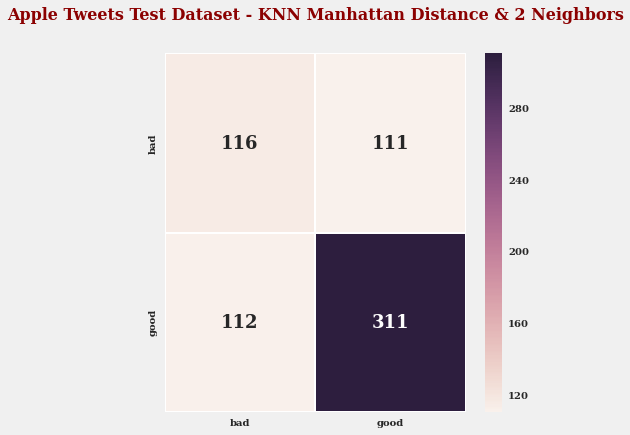

In [75]:
models_test(model, "KNN Manhattan Distance & 2 Neighbors", "a_knn_b2_cm_test.png") 

#### Clearly, KNN Euclidean Distance is are better fit for this dataset than Manhattan

#### KNN Model - Find Best Accuracy Score by Tuning Number of Neigbours

Neighbors: 1, Accuracy: 0.722000
Neighbors: 2, Accuracy: 0.686000
Neighbors: 3, Accuracy: 0.704000
Neighbors: 4, Accuracy: 0.714000
Neighbors: 5, Accuracy: 0.686000
Neighbors: 6, Accuracy: 0.692000
Neighbors: 7, Accuracy: 0.690000
Neighbors: 8, Accuracy: 0.674000
Neighbors: 9, Accuracy: 0.698000
Neighbors: 10, Accuracy: 0.696000
Neighbors: 11, Accuracy: 0.692000
Neighbors: 12, Accuracy: 0.676000
Neighbors: 13, Accuracy: 0.686000
Neighbors: 14, Accuracy: 0.686000
Neighbors: 15, Accuracy: 0.692000
Neighbors: 16, Accuracy: 0.694000
Neighbors: 17, Accuracy: 0.682000
Neighbors: 18, Accuracy: 0.684000
Neighbors: 19, Accuracy: 0.682000
Neighbors: 20, Accuracy: 0.682000
Neighbors: 21, Accuracy: 0.680000
Neighbors: 22, Accuracy: 0.686000
Neighbors: 23, Accuracy: 0.680000
Neighbors: 24, Accuracy: 0.680000
Neighbors: 25, Accuracy: 0.678000
Neighbors: 26, Accuracy: 0.680000
Neighbors: 27, Accuracy: 0.680000
Neighbors: 28, Accuracy: 0.680000
Neighbors: 29, Accuracy: 0.676000
Neighbors: 30, Accuracy

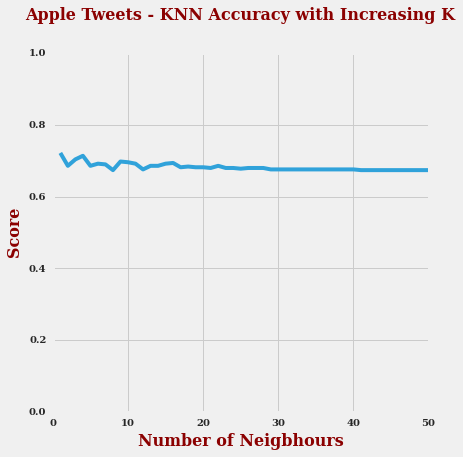

In [76]:
results = []
for n in range(1, 51, 1):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n, weights="uniform", p=2)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))
    print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])
plt.ylim([0,1])
plt.plot(results.n, results.accuracy)
plt.xlabel("Number of Neigbhours", fontdict=font)
plt.ylabel("Score", fontdict=font)
plt.title("Apple Tweets - KNN Accuracy with Increasing K", y=1.08, fontdict=font)
#plt.savefig("a_knn_neigbours.png", bbox_inches='tight')
plt.show()

#### Grid search to find the best number of neighbors

#### KNN Model with Euclidean Distance & 3 Neigbhors (after tuning)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Classification score using train set: 0.8075

Classification score using test set: 0.704


Total running time for this model = 10.2506849766 seconds (0.0 minutes 10.2506849766 seconds)



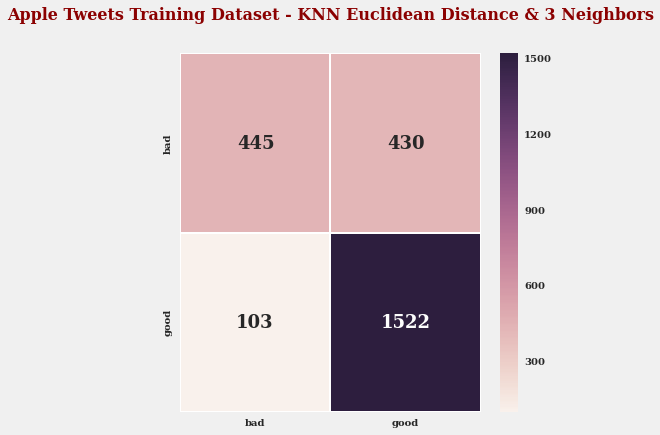

In [77]:
model = neighbors.KNeighborsClassifier(n_neighbors=3, leaf_size=30, weights="uniform", p=2)
models(model, "KNN Euclidean Distance & 3 Neighbors", "a_knn_a_cm_train.png")

#### KNN Model - Test Set AUC Score with Uniform Weights and 3 Neighbours

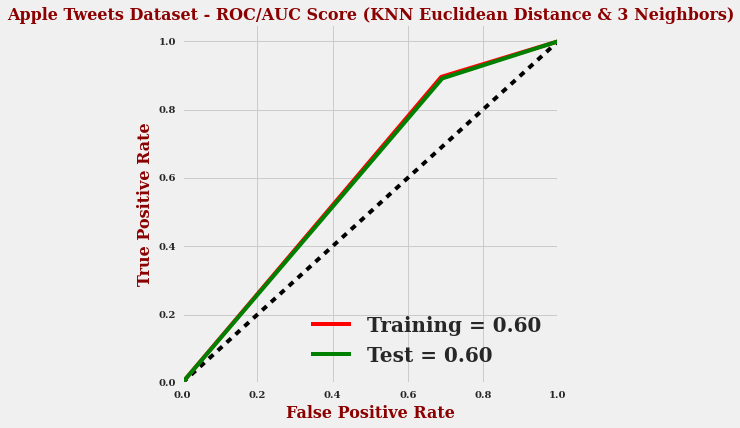

In [78]:
knn_roc, knn_roct = plot_roc(model, "ROC/AUC Score (KNN Euclidean Distance & 3 Neighbors)", "a_knn_a_roc.png")

#### KNN Model - Learning Curve with Uniform Weights and 3 Neighbours

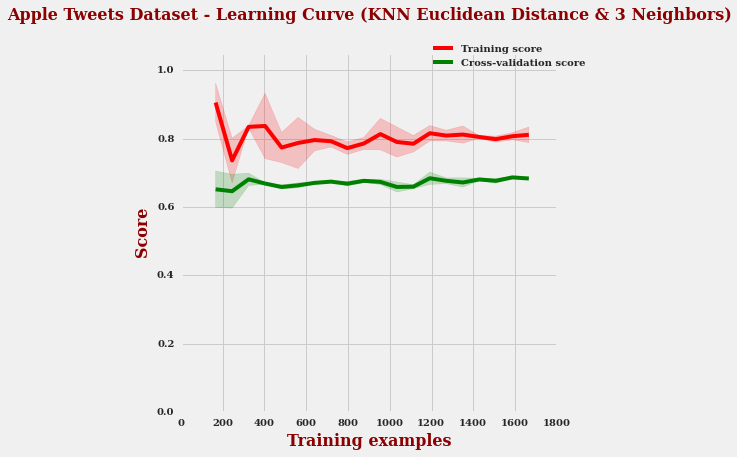

In [79]:
plot_learning_curve(model, "Learning Curve (KNN Euclidean Distance & 3 Neighbors)", "a_knn_a_lca.png", ylim=(0,1.05))

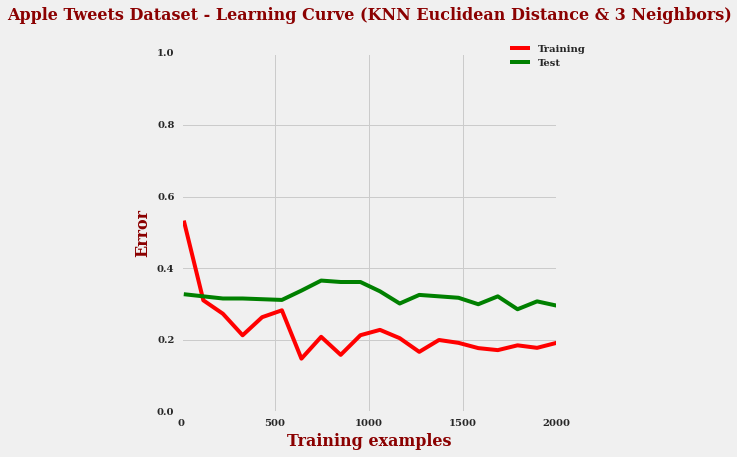

In [80]:
plot_learning_curve_ot(model, "Learning Curve (KNN Euclidean Distance & 3 Neighbors)", "a_knn_a_lce.png")

#### KNN Final Model - Test Set Accuracy with Euclidean Distance & 3 Neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Classification score using test set: 0.687692307692


             precision    recall  f1-score   support

          0       0.60      0.31      0.41       227
          1       0.71      0.89      0.79       423

avg / total       0.67      0.69      0.66       650



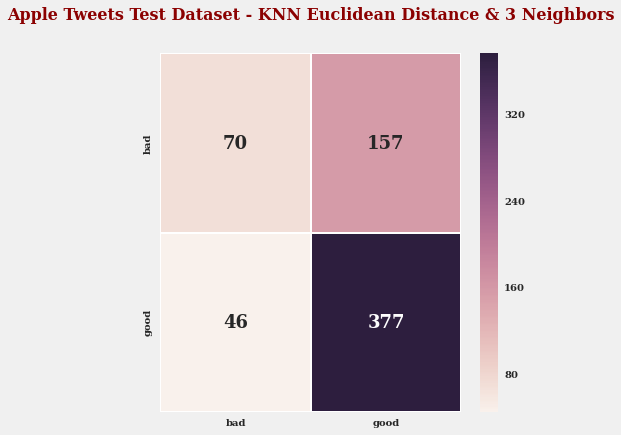

In [81]:
models_test(model, "KNN Euclidean Distance & 3 Neighbors", "a_knn_a_cm_test.png") 

#### Final KNN Model

In [82]:
knn_train_start = time.time()
model.fit(X,y)
knn_train_end = time.time()
knn_train_time = knn_train_end - knn_train_start
print "KNN Training time in seconds : %3f" % (knn_train_time)
print ""
knn_model = model 
print knn_model
print ""
preds = knn_model.predict(X_test)
#knn_validation_accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))

scores = cross_validation.cross_val_score(model, X, y, cv=10)
knn_validation_accuracy = scores.mean()
print "KNN Validation Set Accuracy: %3f" % (knn_validation_accuracy)
print ""

scores = cross_validation.cross_val_score(model, X, y, cv=10, scoring='f1')
knn_validation_f1 = scores.mean()
print "KNN Validation Set f1: %3f" % (knn_validation_f1)
print ""

knn_predict_start = time.time()
preds = knn_model.predict(Xt)
knn_predict_end = time.time()
knn_predict_time = knn_predict_end-knn_predict_start
print "KNN Prediction time in seconds : %3f" % (knn_predict_time)
print ""

knn_test_accuracy = np.where(preds==yt, 1, 0).sum() / float(len(Xt))
print "KNN Test Set Accuracy: %3f" % (knn_test_accuracy)
print ""

knn_test_f1 = metrics.f1_score(yt, preds, average="micro")
print "KNN Test Set f1 Score: %3f" % (knn_test_f1)
print ""

KNN Training time in seconds : 0.079178

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

KNN Validation Set Accuracy: 0.682803

KNN Validation Set f1: 0.782052

KNN Prediction time in seconds : 1.328513

KNN Test Set Accuracy: 0.703077

KNN Test Set f1 Score: 0.795334



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


### Boosting Model

#### AdaBoost Model Before Pruning (Number of Estimators =  50)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=123)

Classification score using train set: 0.987

Classification score using test set: 0.766


Total running time for this model = 96.7171750069 seconds (1.0 minutes 36.7171750069 seconds)



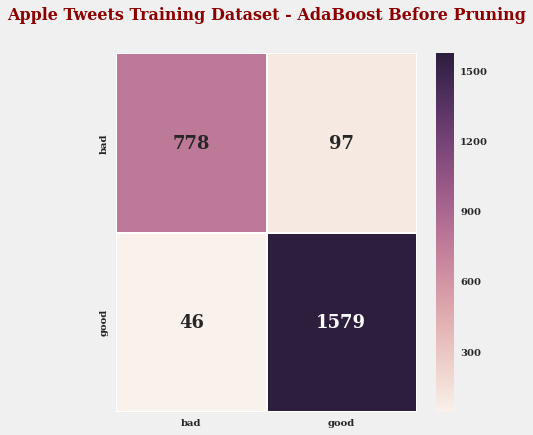

In [83]:
model = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=123, splitter='best'), algorithm='SAMME', n_estimators=50, random_state=123 )
models(model, "AdaBoost Before Pruning", "a_ada_b_cm_train.png")  

####  AdaBoost Model - Test Set ROC/AUC Score Before Pruning

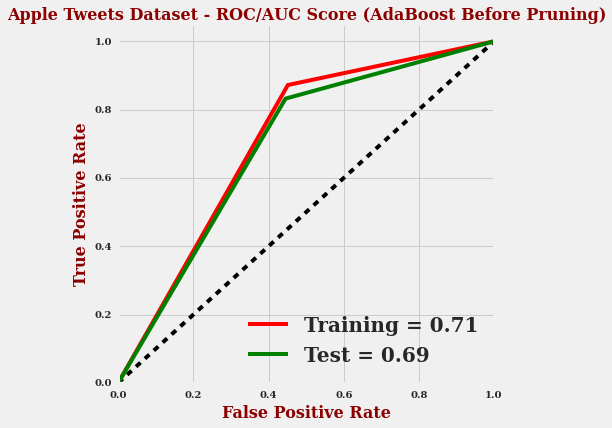

(0.71040214866434392, 0.69360868976578027)

In [84]:
plot_roc(model, "ROC/AUC Score (AdaBoost Before Pruning)", "a_ada_b_roc.png")

####  AdaBoost Model - Learning Curve Before Pruning

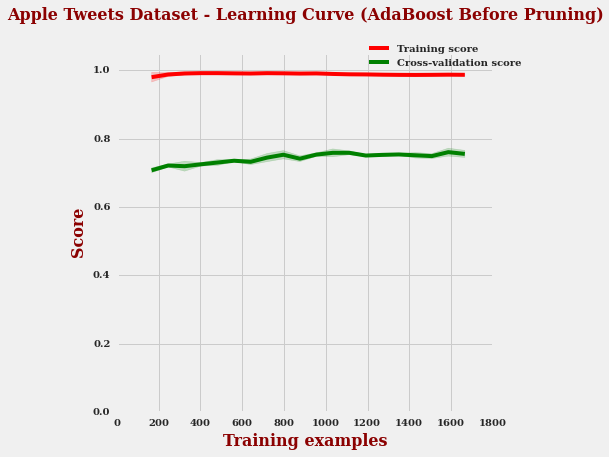

In [85]:
plot_learning_curve(model, "Learning Curve (AdaBoost Before Pruning)", "a_ada_b_lca.png", ylim=(0,1.05))

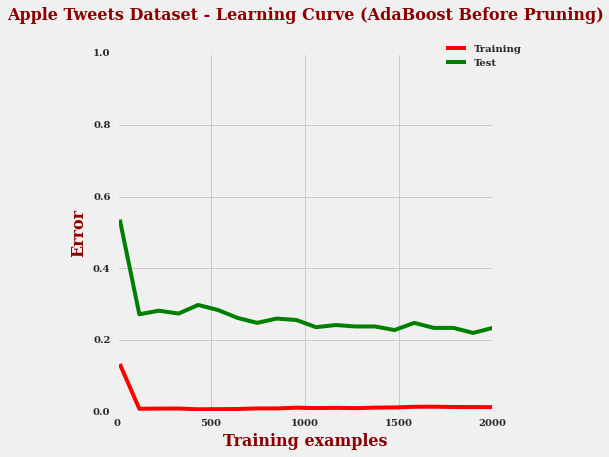

In [86]:
plot_learning_curve_ot(model, "Learning Curve (AdaBoost Before Pruning)", "a_ada_b_lce.png")

####  AdaBoost Model - Test Set Accuracy Before Pruning

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=123)

Classification score using test set: 0.735384615385


             precision    recall  f1-score   support

          0       0.64      0.56      0.59       227
          1       0.78      0.83      0.80       423

avg / total       0.73      0.74      0.73       650



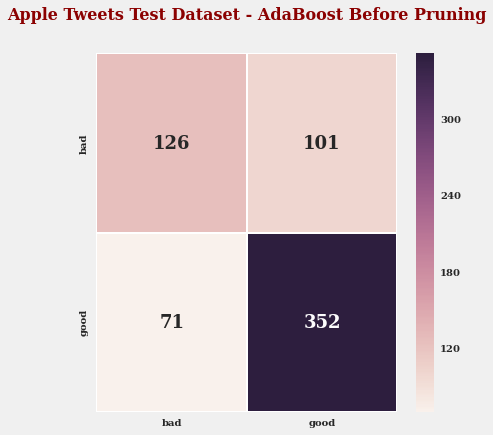

In [87]:
models_test(model, "AdaBoost Before Pruning", "a_ada_b_cm_test.png") 

#### Grid Search to find best accuracy with pruning

#### AdaBoost Model After Pruning

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=9,
            min_samples_split=16, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=123)

Classification score using train set: 0.8215

Classification score using test set: 0.788


Total running time for this model = 14.0980808735 seconds (0.0 minutes 14.0980808735 seconds)



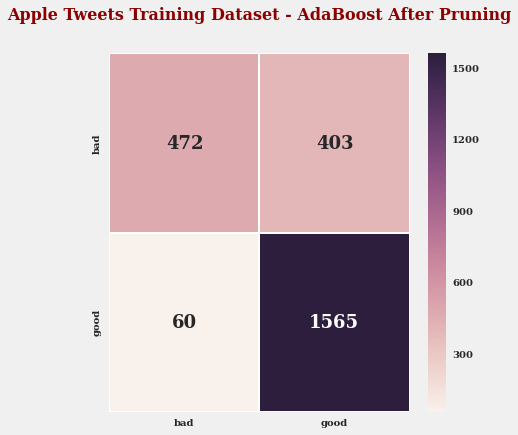

In [88]:
model = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=9,
            min_samples_split=16, min_weight_fraction_leaf=0.0,
            random_state=123, splitter='best'), algorithm='SAMME', n_estimators=100, random_state=123 )
models(model, "AdaBoost After Pruning", "a_ada_a_cm_train.png") 

#### AdaBoost Model - Test Set ROC/AUC Score After Pruning

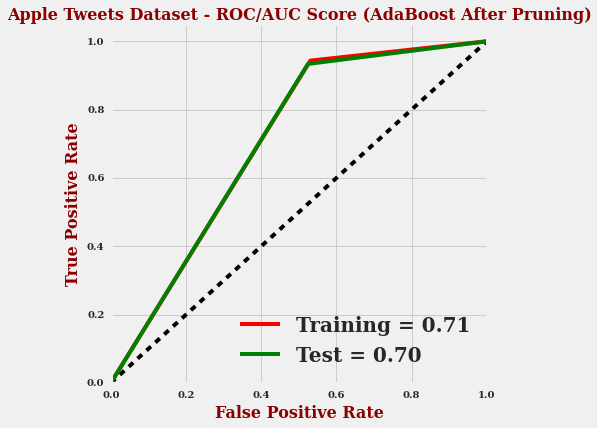

In [89]:
ada_roc, ada_roct = plot_roc(model, "ROC/AUC Score (AdaBoost After Pruning)", "a_ada_a_roc.png")

#### AdaBoost Model - Learning Curve After Pruning

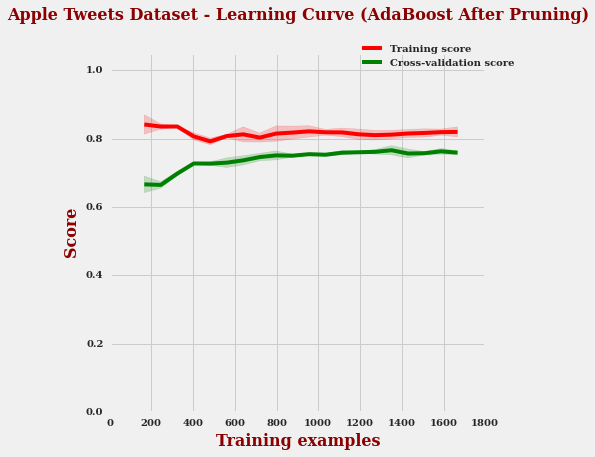

In [90]:
plot_learning_curve(model, "Learning Curve (AdaBoost After Pruning)", "a_ada_a_lca.png", ylim=(0,1.05))

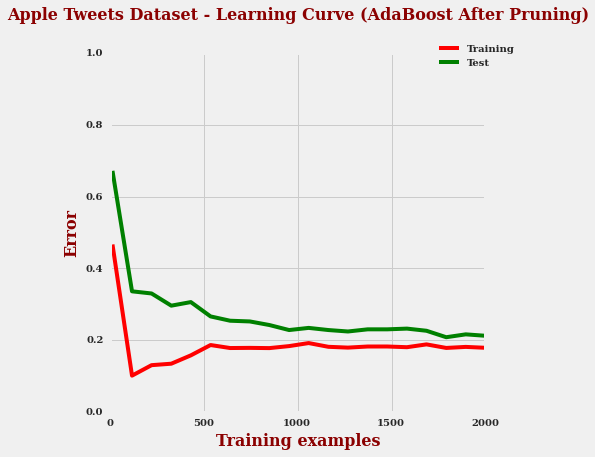

In [91]:
plot_learning_curve_ot(model, "Learning Curve (AdaBoost After Pruning)", "a_ada_a_lce.png")

#### AdaBoost Model - Test Set Accuracy After Pruning

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=9,
            min_samples_split=16, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=123)

Classification score using test set: 0.773846153846


             precision    recall  f1-score   support

          0       0.79      0.48      0.60       227
          1       0.77      0.93      0.84       423

avg / total       0.78      0.77      0.76       650



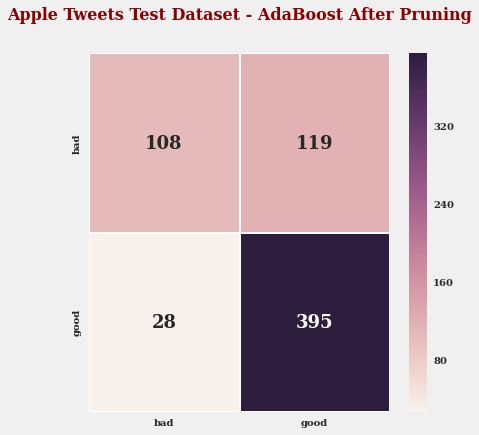

In [92]:
models_test(model, "AdaBoost After Pruning", "a_ada_a_cm_test.png") 

#### Final AdaBoost Model

In [93]:
ada_train_start = time.time()
model.fit(X,y)
ada_train_end = time.time()
ada_train_time = ada_train_end - ada_train_start
print "AdaBoost Training time in seconds : %3f" % (ada_train_time)
print ""
ada_model = model 
print ada_model
print ""
preds = ada_model.predict(X_test)
#ada_validation_accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))
scores = cross_validation.cross_val_score(model, X, y, cv=10)
ada_validation_accuracy = scores.mean()
print "AdaBoost Validation Set Accuracy: %3f" % (ada_validation_accuracy)
print ""

scores = cross_validation.cross_val_score(model, X, y, cv=10, scoring='f1')
ada_validation_f1 = scores.mean()
print "AdaBoost Validation Set f1: %3f" % (ada_validation_f1)
print ""

ada_predict_start = time.time()
preds = ada_model.predict(Xt)
ada_predict_end = time.time()
ada_predict_time = ada_predict_end-ada_predict_start
print "AdaBoost Prediction time in seconds : %3f" % (ada_predict_time)
print ""

ada_test_accuracy = np.where(preds==yt, 1, 0).sum() / float(len(Xt))
print "AdaBoost Test Set Accuracy: %3f" % (ada_test_accuracy)
print ""

ada_test_f1 = metrics.f1_score(yt, preds, average="micro")
print "AdaBoost Test Set f1 Score: %3f" % (ada_test_f1)
print ""

AdaBoost Training time in seconds : 7.704461

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=9,
            min_samples_split=16, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=123)

AdaBoost Validation Set Accuracy: 0.785963

AdaBoost Validation Set f1: 0.850604

AdaBoost Prediction time in seconds : 0.024730

AdaBoost Test Set Accuracy: 0.763077

AdaBoost Test Set f1 Score: 0.833333



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


### SVM Model

#### SVM Model Design

- SVM penality parameter C value of 1 gives better accuracy.
- Linear Kernel gives better accuracy than RBF or Poly. Linear kernel gives best performance since this is a linearly seperable dataset.

#### SVM Model Before Tuning (RBF Kernel & C=1.0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

Classification score using train set: 0.6445

Classification score using test set: 0.672


Total running time for this model = 35.1845860481 seconds (0.0 minutes 35.1845860481 seconds)



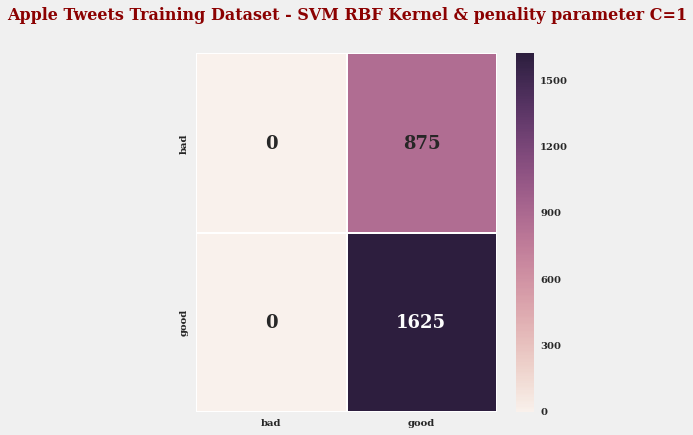

In [94]:
model = svm.SVC(probability=True, random_state=123)
models(model, "SVM RBF Kernel & penality parameter C=1", "a_svm_b_cm_train.png")   

#### SVM Model - Train Set ROC/AUC Score Before Tuning (RBF Kernel & C=1.0)

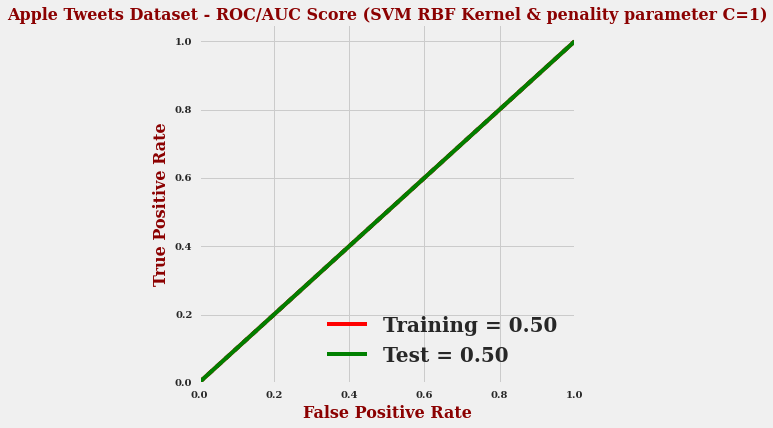

(0.5, 0.5)

In [95]:
plot_roc(model, "ROC/AUC Score (SVM RBF Kernel & penality parameter C=1)", "a_svm_b_roc.png")

#### SVM Model - Learning Curve Before Tuning (RBF Kernel & C=1.0)

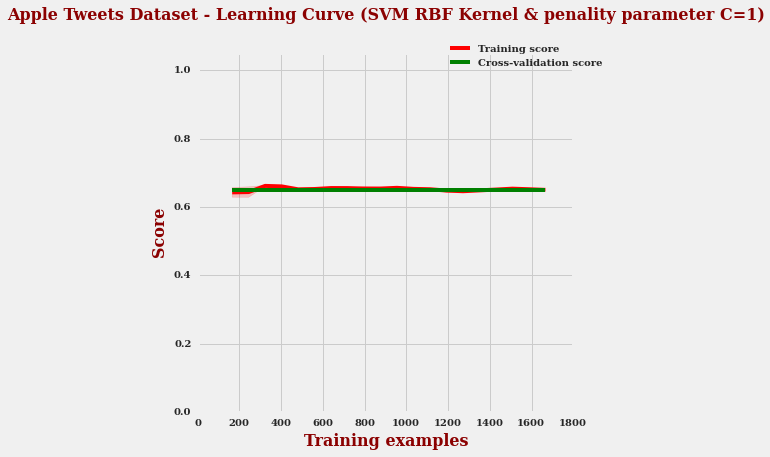

In [96]:
plot_learning_curve(model, "Learning Curve (SVM RBF Kernel & penality parameter C=1)", "a_svm_b_lca.png", ylim=(0,1.05))

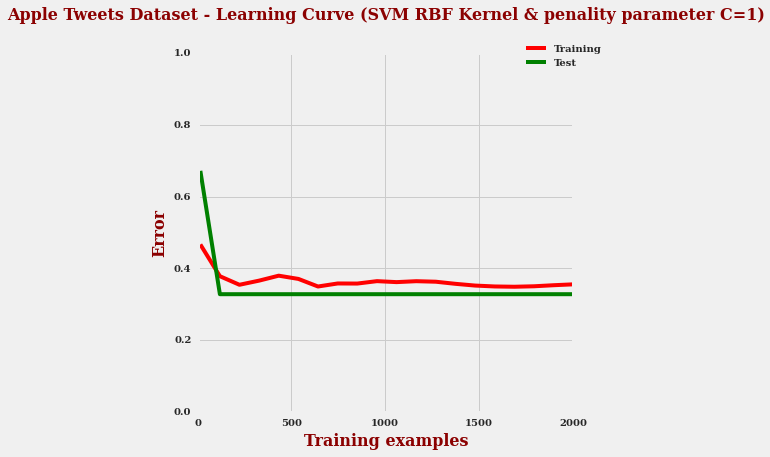

In [97]:
plot_learning_curve_ot(model, "Learning Curve (SVM RBF Kernel & penality parameter C=1)", "a_svm_b_lce.png")

#### SVM Model - Test Set Accuracy Before Tuning (RBF Kernel & C=1.0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

Classification score using test set: 0.650769230769


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       227
          1       0.65      1.00      0.79       423

avg / total       0.42      0.65      0.51       650



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


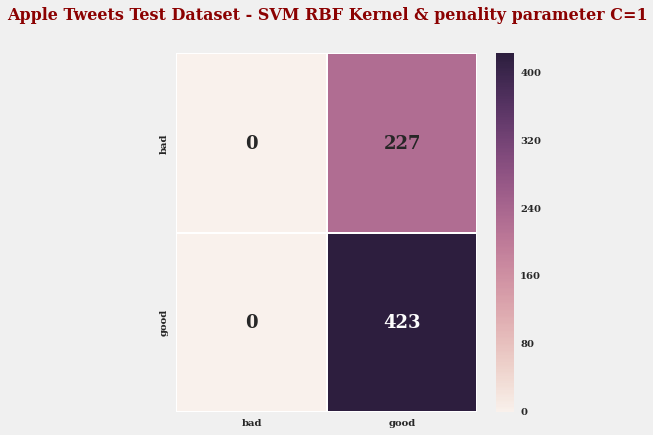

In [98]:
models_test(model, "SVM RBF Kernel & penality parameter C=1", "a_svm_b_cm_test.png") 

#### SVM Model Before Tuning (Poly Kernel & C=1.0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

Classification score using train set: 0.6445

Classification score using test set: 0.672


Total running time for this model = 35.0632088184 seconds (0.0 minutes 35.0632088184 seconds)



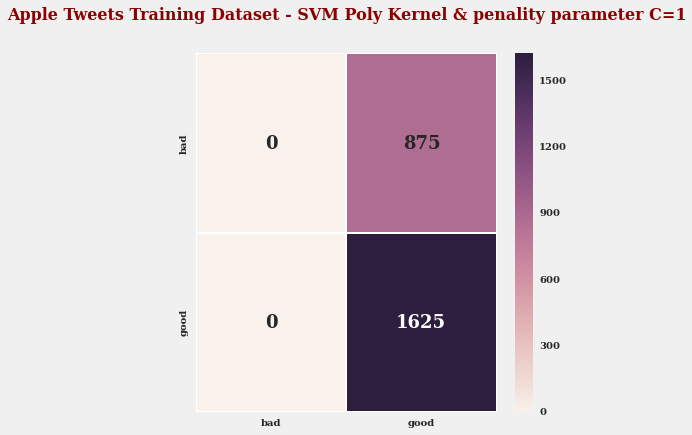

In [99]:
model = svm.SVC(probability=True, random_state=123)
models(model, "SVM Poly Kernel & penality parameter C=1", "a_svm_b2_cm_train.png")  

#### SVM Model - Train Set ROC/AUC Score Before Tuning (Poly Kernel & C=1.0)

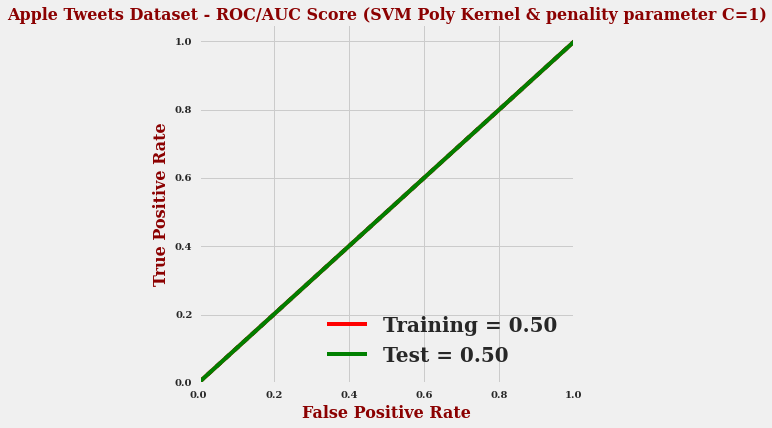

(0.5, 0.5)

In [100]:
plot_roc(model, "ROC/AUC Score (SVM Poly Kernel & penality parameter C=1)", "a_svm_b2_roc.png")

#### SVM Model - Learning Curve Before Tuning (Poly Kernel & C=1.0)

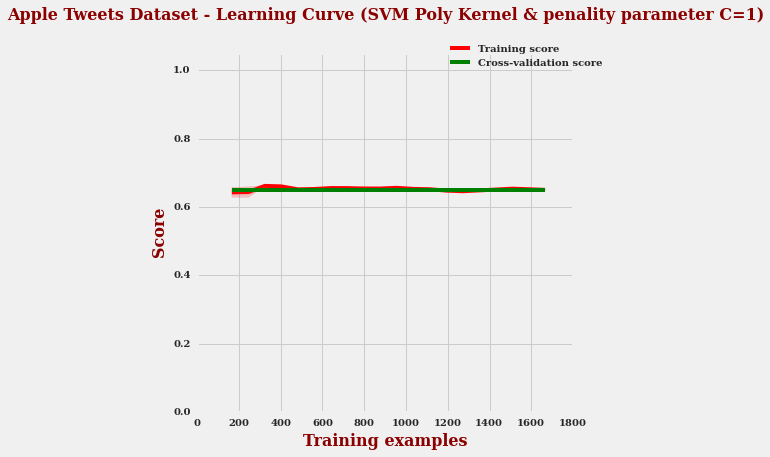

In [101]:
plot_learning_curve(model, "Learning Curve (SVM Poly Kernel & penality parameter C=1)", "a_svm_b2_lca.png", ylim=(0,1.05))

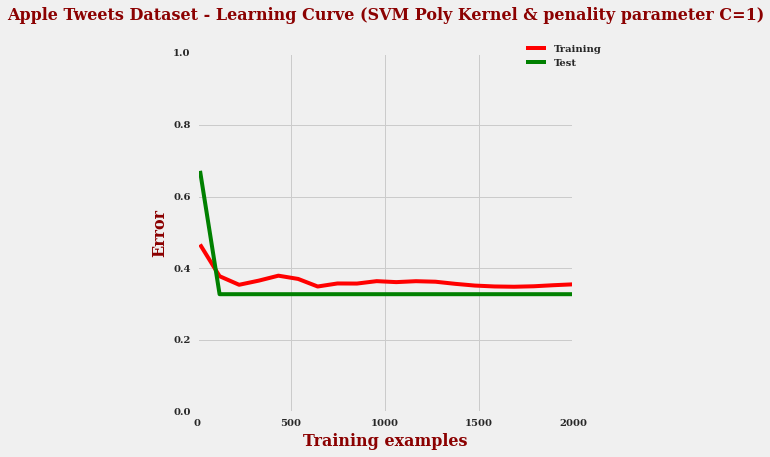

In [102]:
plot_learning_curve_ot(model, "Learning Curve (SVM Poly Kernel & penality parameter C=1)", "a_svm_b2_lce.png")

####SVM Model - Test Set Accuracy Before Tuning (Poly Kernel & C=1.0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

Classification score using test set: 0.650769230769


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       227
          1       0.65      1.00      0.79       423

avg / total       0.42      0.65      0.51       650



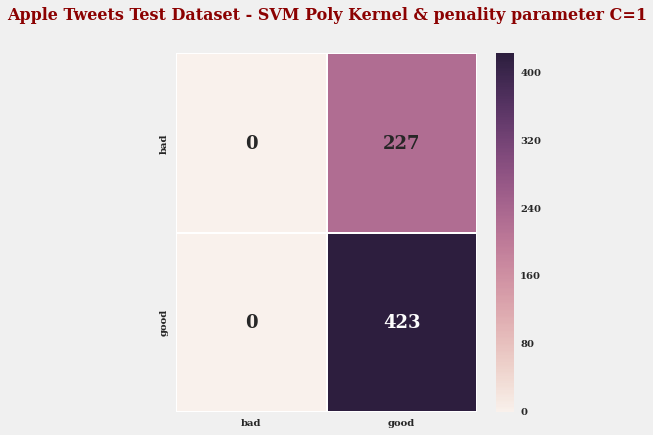

In [103]:
models_test(model, "SVM Poly Kernel & penality parameter C=1", "a_svm_b2_cm_test.png") 

#### SVM Model - Find Best Accuracy Score Tuning Parameters 

#### SVM Model - Grid Search using 5 fold cross validation to find best parameters

#### SVM Model After Tuning Parameters (Linear Kernel & penality parameter C=1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0, kernel='linear',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

Classification score using train set: 0.88

Classification score using test set: 0.794


Total running time for this model = 27.6052639484 seconds (0.0 minutes 27.6052639484 seconds)



/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)


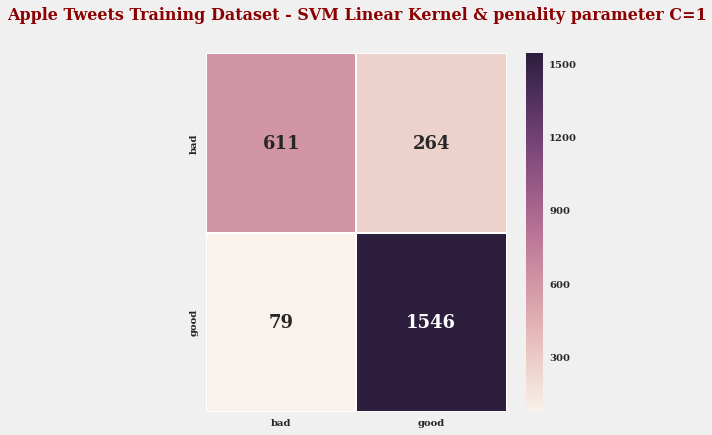

In [104]:
model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=True, random_state=123,
  shrinking=True, tol=0.001, verbose=False)
models(model, "SVM Linear Kernel & penality parameter C=1", "a_svm_a_cm_train.png") 

#### SVM Model - Test Set ROC/AUC Score After Tuning Parameters

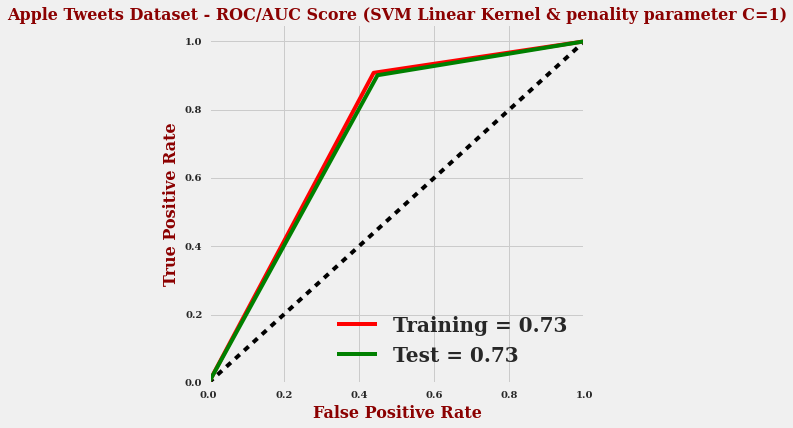

In [105]:
svm_roc, svm_roct = plot_roc(model, "ROC/AUC Score (SVM Linear Kernel & penality parameter C=1)", "a_svm_a_roc.png")

#### SVM Model - Learning Curve SVM Model After Tuning Parameters (Linear Kernel & penality parameter C=1)

/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: Depre

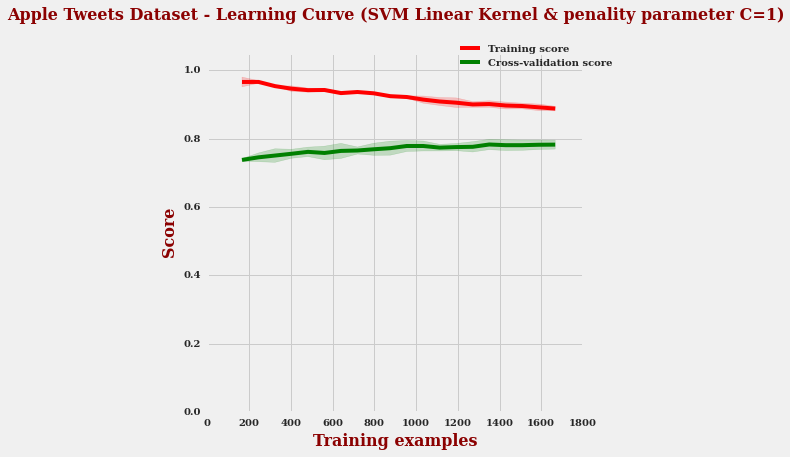

In [106]:
plot_learning_curve(model, "Learning Curve (SVM Linear Kernel & penality parameter C=1)", "a_svm_a_lca.png", ylim=(0,1.05))

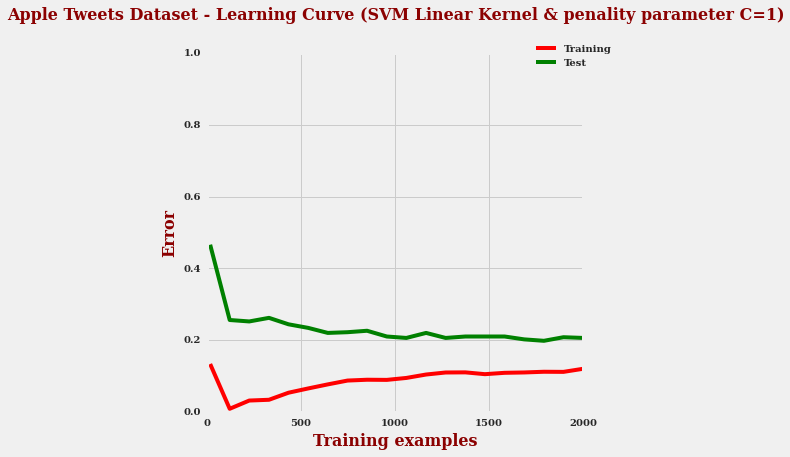

In [107]:
plot_learning_curve_ot(model, "Learning Curve (SVM Linear Kernel & penality parameter C=1)", "a_svm_a_lce.png")

#### SVM Model - Test Set Accuracy SVM Model After Tuning Parameters (Linear Kernel & penality parameter C=1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0, kernel='linear',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

Classification score using test set: 0.778461538462


             precision    recall  f1-score   support

          0       0.75      0.55      0.63       227
          1       0.79      0.90      0.84       423

avg / total       0.77      0.78      0.77       650



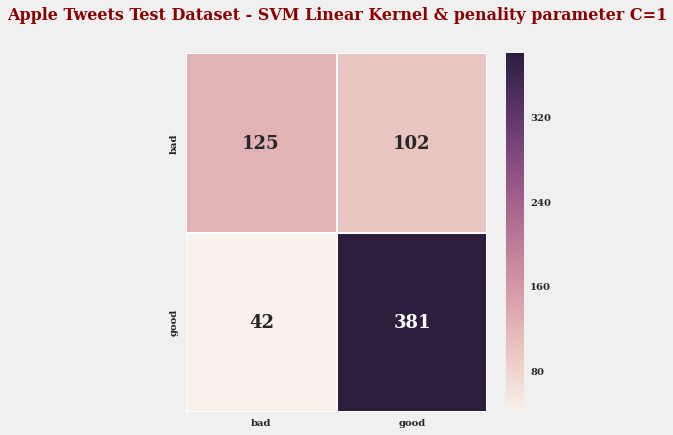

In [108]:
models_test(model, "SVM Linear Kernel & penality parameter C=1", "a_svm_a_cm_test.png")

#### Final SVM Model

In [109]:
svm_train_start = time.time()
model.fit(X,y)
svm_train_end = time.time()
svm_train_time = svm_train_end - svm_train_start
print "SVM Training time in seconds : %3f" % (svm_train_time)
print ""
svm_model = model 
print svm_model
print ""
preds = svm_model.predict(X_test)
#svm_validation_accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))

scores = cross_validation.cross_val_score(model, X, y, cv=10)
svm_validation_accuracy = scores.mean()
print "SVM Validation Set Accuracy: %3f" % (svm_validation_accuracy)
print ""

scores = cross_validation.cross_val_score(model, X, y, cv=10, scoring='f1')
svm_validation_f1 = scores.mean()
print "SVM Validation Set f1: %3f" % (svm_validation_f1)
print ""

svm_predict_start = time.time()
preds = svm_model.predict(Xt)
svm_predict_end = time.time()
svm_predict_time = svm_predict_end-svm_predict_start
print "SVM Prediction time in seconds : %3f" % (svm_predict_time)
print ""

svm_test_accuracy = np.where(preds==yt, 1, 0).sum() / float(len(Xt))
print "SVM Test Set Accuracy: %3f" % (svm_test_accuracy)
print ""

svm_test_f1 = metrics.f1_score(yt, preds, average="micro")
print "SVM Test Set f1 Score: %3f" % (svm_test_f1)
print ""

/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: Depre

SVM Training time in seconds : 13.731134

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0, kernel='linear',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

SVM Validation Set Accuracy: 0.789928

/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:85: Depre



SVM Validation Set f1: 0.847497

SVM Prediction time in seconds : 0.649007

SVM Test Set Accuracy: 0.793846

SVM Test Set f1 Score: 0.853070



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


### Summary - Comparision of Different Algorithms

#### Comparision of Accuracy Score for Different Classifiers

In [110]:
df_data = [{'Model' : 'Decision Tree', 'Test_Accuracy': dt_test_accuracy, 'Training_Accuracy':dt_validation_accuracy},
           {'Model' : 'KNN', 'Test_Accuracy': knn_test_accuracy, 'Training_Accuracy':knn_validation_accuracy},
           {'Model' : 'AdaBoost', 'Test_Accuracy': ada_test_accuracy, 'Training_Accuracy':ada_validation_accuracy},
           {'Model' : 'SVM', 'Test_Accuracy': svm_test_accuracy, 'Training_Accuracy':svm_validation_accuracy}]
df_scores = pd.DataFrame(df_data)
df_scores = df_scores.sort('Test_Accuracy')
df_scores.head()

Model  Test_Accuracy  Training_Accuracy
1            KNN       0.703077           0.682803
0  Decision Tree       0.736923           0.739604
2       AdaBoost       0.763077           0.785963
3            SVM       0.793846           0.789928

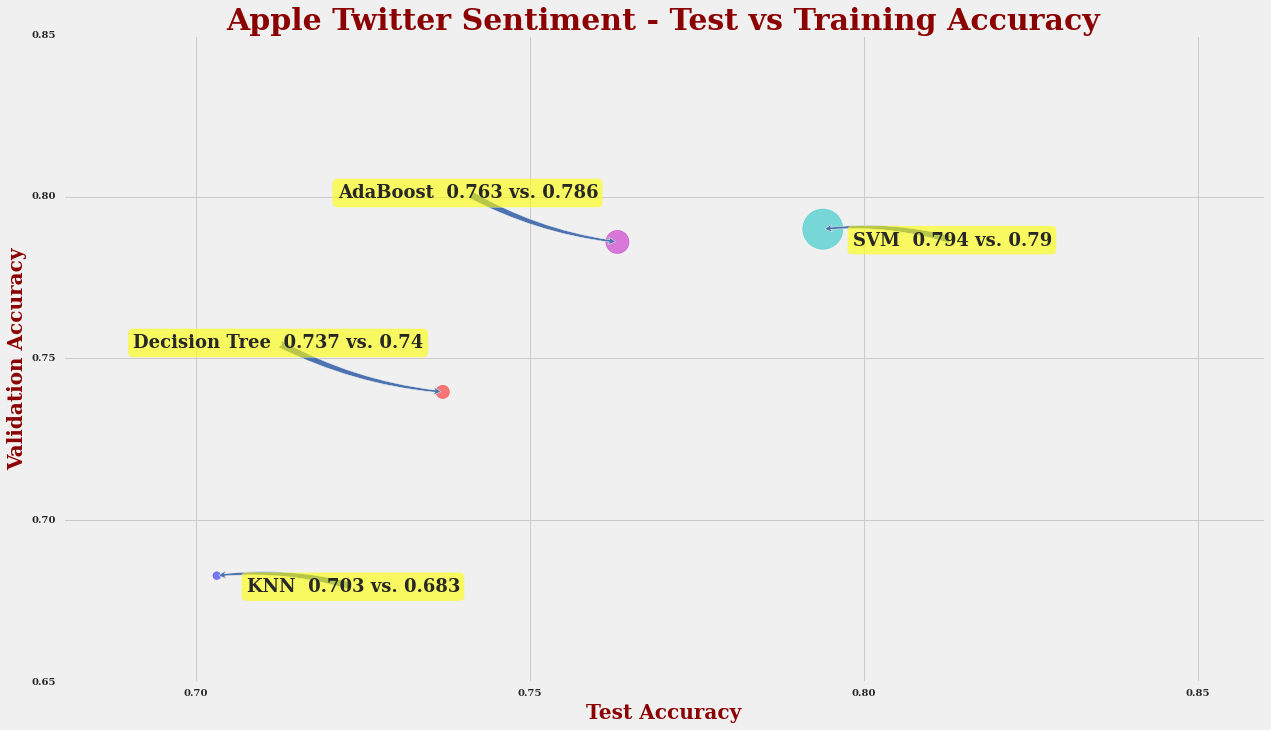

In [111]:
a = df_scores.Test_Accuracy.values
b = df_scores.Training_Accuracy.values
z = df_scores.Model.values
c = ["b", "r", "m", "c", "g"]
s = [60*3**n for n in range(len(a))]

fig, ax = plt.subplots()

ax.scatter(a,b,c=c,s=s, edgecolor=c, alpha=0.5)
ax.set_xlabel(r'Test Accuracy', fontsize=20, fontdict=font)
ax.set_ylabel(r'Validation Accuracy', fontsize=20, fontdict=font)
ax.set_title('Apple Twitter Sentiment - Test vs Training Accuracy',  fontsize=30, fontdict=font)
ax.grid(True)

for i, txt in enumerate(a):
    #ax.annotate(z[i], (a[i],b[i]))
    if z[i] == 'Neural Net': 
        ha = "right"
        xytext = (-60,60)
    elif z[i] == 'Decision Tree' or z[i] == 'AdaBoost':
        ha = "right"
        xytext = (-20,40)
    else:
        ha = "left"
        xytext = (30,-20)
    
    ax.annotate(
        z[i] + "  " + str(round(a[i],3)) + " vs. " + str(round(b[i],3)), 
        xy = (a[i],b[i],), xytext = xytext,
        textcoords = 'offset points' , ha = ha, va = "bottom",
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.6),
        arrowprops = dict(arrowstyle = "fancy", connectionstyle = 'arc3,rad=0.1'))
    

fig.set_size_inches(18.0, 10.5)
fig.tight_layout()
#fig.savefig("ats_classifiers_performance.png", bbox_inches='tight')
fig.show()

#### Comparision of f1 Score for Different Classifiers

In [112]:
df_f1_data = [{'Model' : 'Decision Tree', 'Test_f1': dt_test_f1, 'Training_f1':dt_validation_f1},
           {'Model' : 'KNN', 'Test_f1': knn_test_f1, 'Training_f1':knn_validation_f1},
           {'Model' : 'AdaBoost', 'Test_f1': ada_test_f1, 'Training_f1':ada_validation_f1},
           {'Model' : 'SVM', 'Test_f1': svm_test_f1, 'Training_f1':svm_validation_f1}]
df_f1_scores = pd.DataFrame(df_f1_data)
df_f1_scores = df_f1_scores.sort('Test_f1')
df_f1_scores.head()

Model   Test_f1  Training_f1
1            KNN  0.795334     0.782052
0  Decision Tree  0.816720     0.818588
2       AdaBoost  0.833333     0.850604
3            SVM  0.853070     0.847497

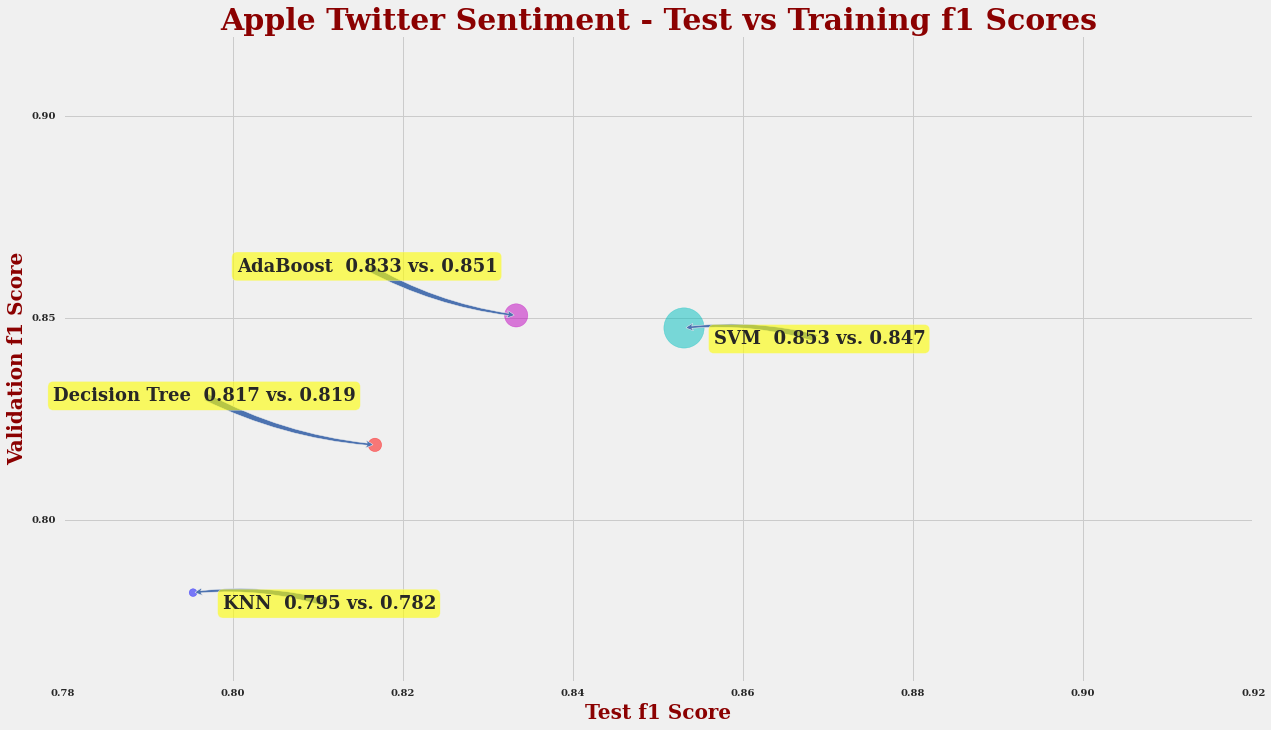

In [113]:
a = df_f1_scores.Test_f1.values
b = df_f1_scores.Training_f1.values
z = df_f1_scores.Model.values
c = ["b", "r", "m", "c", "g"]
s = [60*3**n for n in range(len(a))]

fig, ax = plt.subplots()

ax.scatter(a,b,c=c,s=s, edgecolor=c, alpha=0.5)
ax.set_xlabel(r'Test f1 Score', fontsize=20, fontdict=font)
ax.set_ylabel(r'Validation f1 Score', fontsize=20, fontdict=font)
ax.set_title('Apple Twitter Sentiment - Test vs Training f1 Scores',  fontsize=30, fontdict=font)
ax.grid(True)

for i, txt in enumerate(a):
    #ax.annotate(z[i], (a[i],b[i]))
    if z[i] == 'Neural Net': 
        ha = "right"
        xytext = (-60,60)
    elif z[i] == 'Decision Tree' or z[i] == 'AdaBoost':
        ha = "right"
        xytext = (-20,40)
    else:
        ha = "left"
        xytext = (30,-20)
    
    ax.annotate(
        z[i] + "  " + str(round(a[i],3)) + " vs. " + str(round(b[i],3)), 
        xy = (a[i],b[i],), xytext = xytext,
        textcoords = 'offset points' , ha = ha, va = "bottom",
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.6),
        arrowprops = dict(arrowstyle = "fancy", connectionstyle = 'arc3,rad=0.1'))
    

fig.set_size_inches(18.0, 10.5)
fig.tight_layout()
#fig.savefig("ats_f1_performance.png", bbox_inches='tight')
fig.show()

In [114]:
df_time_data = [{'Model' : 'Decision Tree', 'Training_Time': dt_train_time, 'Prediction_Time':dt_predict_time},
           {'Model' : 'KNN', 'Training_Time': knn_train_time, 'Prediction_Time':knn_predict_time},
           {'Model' : 'AdaBoost', 'Training_Time': ada_train_time, 'Prediction_Time':ada_predict_time},
           {'Model' : 'SVM', 'Training_Time': svm_train_time, 'Prediction_Time':svm_predict_time}]
df_times = pd.DataFrame(df_time_data)
df_times = df_times.sort('Training_Time')
df_times.head()

Model  Prediction_Time  Training_Time
0  Decision Tree         0.001246       0.024111
1            KNN         1.328513       0.079178
2       AdaBoost         0.024730       7.704461
3            SVM         0.649007      13.731134

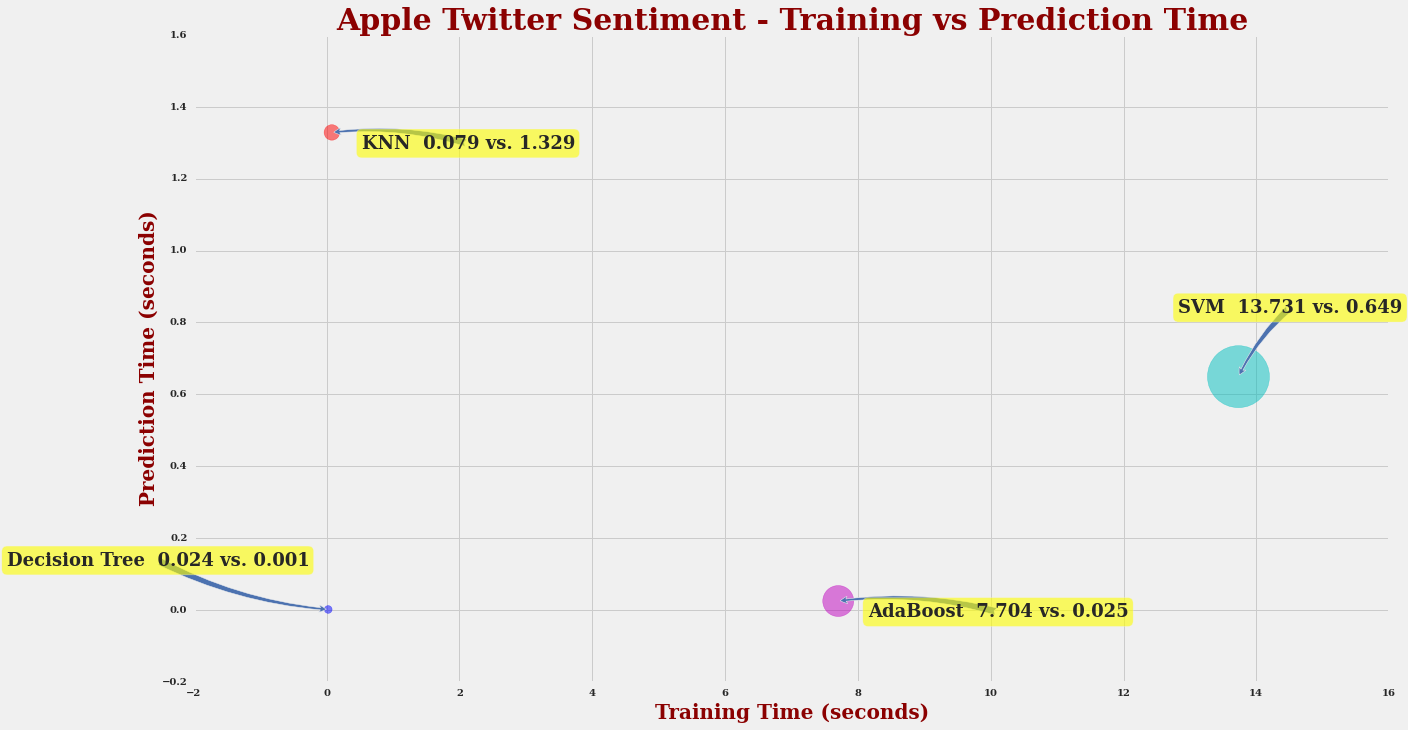

In [115]:
a = df_times.Training_Time.values
b = df_times.Prediction_Time.values
z = df_times.Model.values
c = ["b", "r", "m", "c", "g"]
s = [60*4**n for n in range(len(a))]

fig, ax = plt.subplots()

ax.scatter(a,b,c=c,s=s, edgecolor=c, alpha=0.5)
ax.set_xlabel(r'Training Time (seconds)', fontsize=20, fontdict=font)
ax.set_ylabel(r'Prediction Time (seconds)', fontsize=20, fontdict=font)
ax.set_title('Apple Twitter Sentiment - Training vs Prediction Time', fontsize=30, fontdict=font)
ax.grid(True)

for i, txt in enumerate(a):
    #ax.annotate((z[i], a[i],b[i],
    #         arrowprops=dict(arrowstyle="->"))
    if z[i] == 'SVM': 
        ha = "left"
        xytext = (-60,60)
    elif z[i] == 'Decision Tree' or z[i] == 'Neural Net':
        ha = "right"
        xytext = (-20,40)
    else:
        ha = "left"
        xytext = (30,-20)
    
    ax.annotate(
        z[i] + "  " + str(round(a[i],3)) + " vs. " + str(round(b[i],3)), 
        xy = (a[i],b[i],), xytext = xytext,
        textcoords = 'offset points' , ha = ha, va = "bottom",
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.6),
        arrowprops = dict(arrowstyle = "fancy", connectionstyle = 'arc3,rad=0.1'))
    
fig.set_size_inches(18.0, 10.5)
fig.tight_layout()
#fig.savefig("ats_classifiers_time.png", bbox_inches='tight')
fig.show()

In [116]:
df_roc_data = [{'Model' : 'Decision Tree', 'Test_ROC': dt_roct, 'Training_ROC':dt_roc},
           {'Model' : 'KNN', 'Test_ROC': knn_roct, 'Training_ROC':knn_roc},
           {'Model' : 'AdaBoost', 'Test_ROC': ada_roct, 'Training_ROC':ada_roc},
           {'Model' : 'SVM', 'Test_ROC': svm_roct, 'Training_ROC':svm_roc}]
df_rocs = pd.DataFrame(df_roc_data)
df_rocs = df_rocs.sort('Test_ROC')
df_rocs.head()

Model  Test_ROC  Training_ROC
1            KNN  0.599811      0.603404
0  Decision Tree  0.680127      0.691529
2       AdaBoost  0.704789      0.706482
3            SVM  0.725685      0.734357

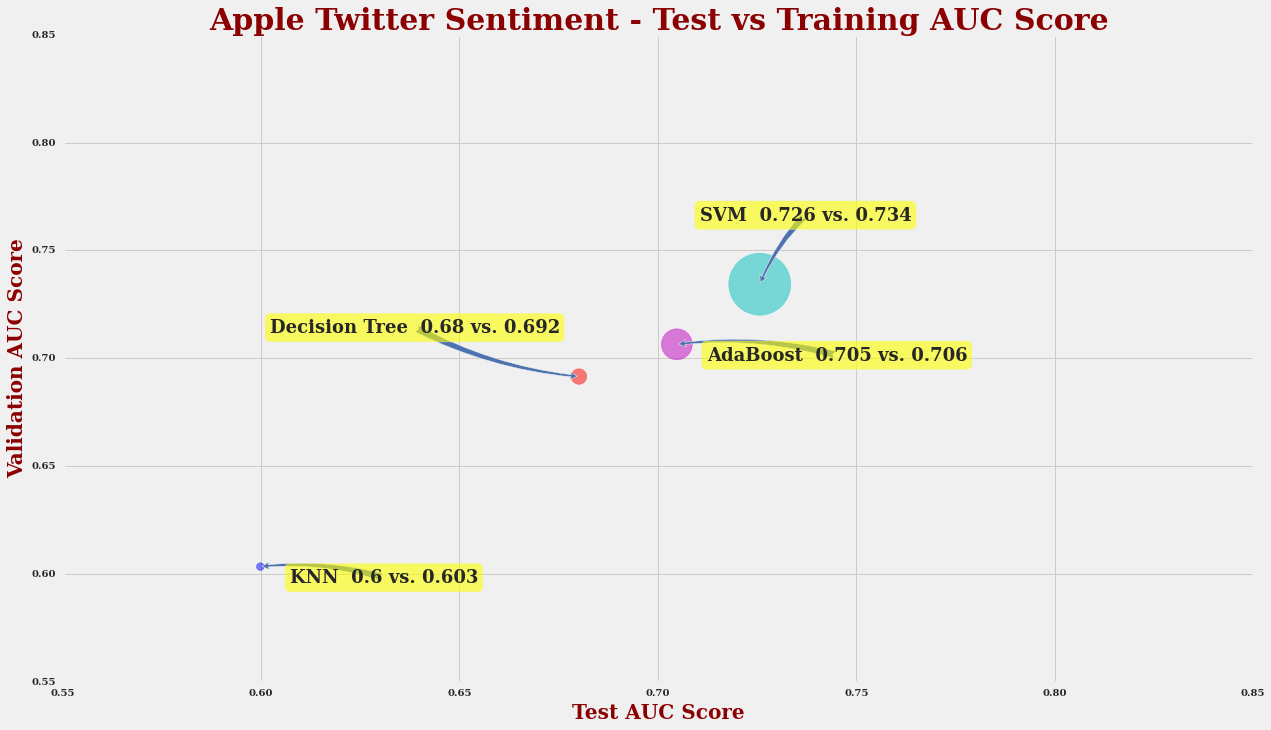

In [117]:
a = df_rocs.Test_ROC.values
b = df_rocs.Training_ROC.values
z = df_rocs.Model.values
c = ["b", "r", "m", "c", "g"]
s = [60*4**n for n in range(len(a))]

fig, ax = plt.subplots()

ax.scatter(a,b,c=c,s=s, edgecolor=c, alpha=0.5)
ax.set_xlabel(r'Test AUC Score', fontsize=20, fontdict=font)
ax.set_ylabel(r'Validation AUC Score', fontsize=20, fontdict=font)
ax.set_title('Apple Twitter Sentiment - Test vs Training AUC Score', fontsize=30, fontdict=font)
ax.grid(True)

for i, txt in enumerate(a):
    #ax.annotate((z[i], a[i],b[i],
    #         arrowprops=dict(arrowstyle="->"))
    if z[i] == 'SVM': 
        ha = "left"
        xytext = (-60,60)
    elif z[i] == 'Decision Tree':
        ha = "right"
        xytext = (-20,40)
    else:
        ha = "left"
        xytext = (30,-20)
    
    ax.annotate(
        z[i] + "  " + str(round(a[i],3)) + " vs. " + str(round(b[i],3)),
        xy = (a[i],b[i],), xytext = xytext,
        textcoords = 'offset points' , ha = ha, va = "bottom",
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.6),
        arrowprops = dict(arrowstyle = "fancy", connectionstyle = 'arc3,rad=0.1'))
    
fig.set_size_inches(18.0, 10.5)
fig.tight_layout()
fig.show()

## Contact Info:

#### Balaji Sundaresan
#### Please feel free to email me if you have any questions @ <a href="sbalajis@gmail.com">sbalajis@gmail.com</a>
#### I am on twitter  <a href="https://twitter.com/maximusandme">@maximusandme</a>
#### And <a href="https://www.linkedin.com/in/balajisundaresan">linked in</a>
#### Github: https://github.com/sbalajis/New_Jersey_Data_Science_Meetup